# <span style='color: green;'>The Amphibians Problem </span> 

#### We will follow the ML pipeline the building our model


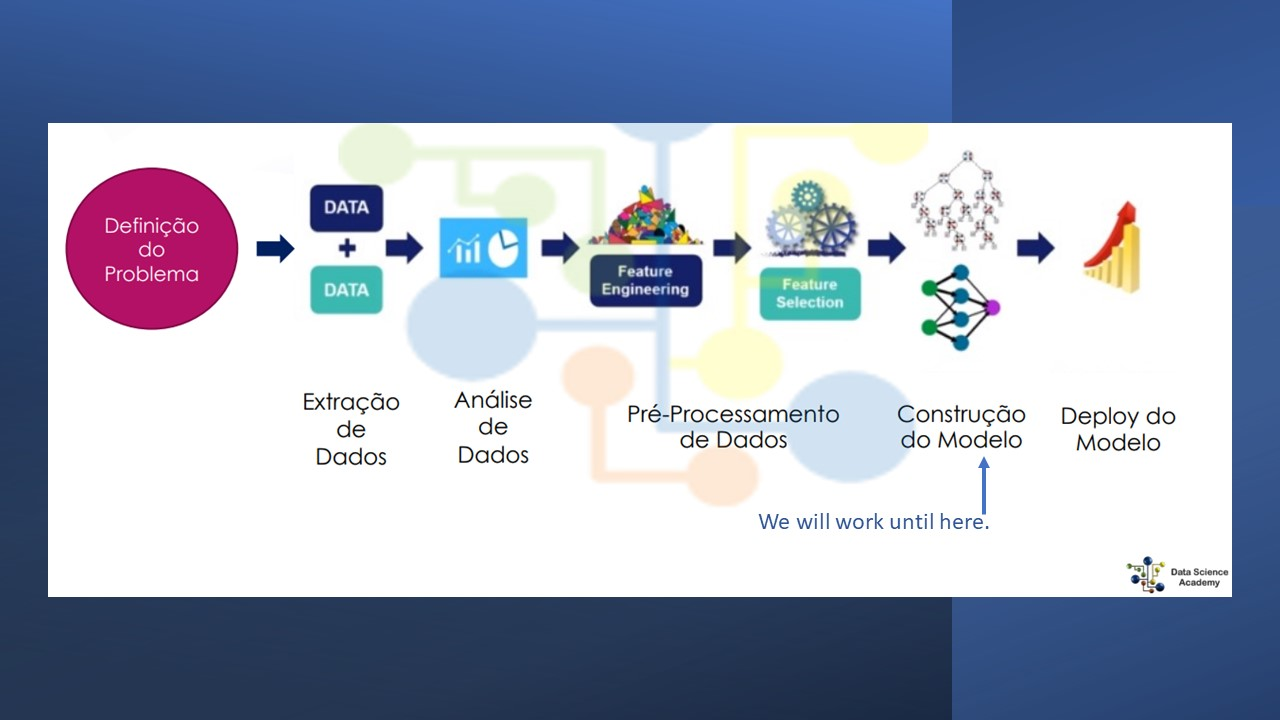

1. The Problem Definition
2. Importing and Analysing the data
    2.1. Exploring the data
        2.1.1 checking the shape
        2.1.2 Verifing the columns names
        2.1.3 Checking the type of columns


<img src="img/ml_pipeline.jpg" alt="PIPELINE" width="50"/>

# The Problem Definition

The dataset is a multilabel classification problem. The goal is to predict the presence of amphibians species near the water reservoirs based on features obtained from GIS systems and satellite images
font: https://archive.ics.uci.edu/dataset/528/amphibians

https://www.mdpi.com/2220-9964/8/3/123


outro artigo interessante https://www.mdpi.com/2220-9964/12/9/354


In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import BinaryRelevance
import multiprocessing

# Importing and Analysing the data

In [2]:
# uploading data
path = "amphibians\dataset.csv"

In [3]:
df = pd.read_csv(path, sep=(";"))

In [4]:
df.head(7)

,Integer,Categorical,Numerical,Numerical.1,Categorical.1,Categorical.2,Categorical.3,Categorical.4,Categorical.5,Categorical.6,...,Ordinal.1,Categorical.8,Categorical.9,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
1,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
2,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
4,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
5,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1
6,6,A1,200,1,5,1,6,6,10,1,...,0,0,1,0,0,0,0,0,0,0


In [5]:
type_and_column = df.iloc[0:1].T
type_and_column

,0
Integer,ID
Categorical,Motorway
Numerical,SR
Numerical.1,NR
Categorical.1,TR
Categorical.2,VR
Categorical.3,SUR1
Categorical.4,SUR2
Categorical.5,SUR3
Categorical.6,UR


We can see details about the data in https://www.mdpi.com/2220-9964/8/3/123   
Each of feature has important information about the data, for exemple: The distant of buildings, trashs on the reservoirs, etc.  
The data used in the experiments was derived from GIS and satellite information, as well as from information gathered from the natural inventories that were prepared for the EIA reports for two planned road projects (Road A and Road B) in Poland [33,34,35,36,37].



<img src = "https://www.mdpi.com/ijgi/ijgi-08-00123/article_deploy/html/images/ijgi-08-00123-g002-550.jpg"  width="40%" height="5%">


### Exploring the data

#### We can see that the heads of the columns are the types of columns, let's fix that.

In [6]:
df_tranf_heads = pd.DataFrame(df.values[1:], columns=df.iloc[0])
df_tranf_heads.head(7)

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1
5,6,A1,200,1,5,1,6,6,10,1,...,0,0,1,0,0,0,0,0,0,0
6,7,A1,500,1,5,0,6,6,10,1,...,0,0,2,0,0,1,0,0,0,0


In [7]:
#checking the shape
df_tranf_heads.shape

(189, 23)

In [8]:
#Verifing the columns names
df_tranf_heads.columns

Index(['ID', 'Motorway', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR',
       'FR', 'OR', 'RR', 'BR', 'MR', 'CR', 'Green frogs', 'Brown frogs',
       'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt',
       'Great crested newt'],
      dtype='object', name=0)

In [9]:
#Checking the type of columns
df_tranf_heads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    object
 3   NR                  189 non-null    object
 4   TR                  189 non-null    object
 5   VR                  189 non-null    object
 6   SUR1                189 non-null    object
 7   SUR2                189 non-null    object
 8   SUR3                189 non-null    object
 9   UR                  189 non-null    object
 10  FR                  189 non-null    object
 11  OR                  189 non-null    object
 12  RR                  189 non-null    object
 13  BR                  189 non-null    object
 14  MR                  189 non-null    object
 15  CR                  189 non-null    object
 16  Green frogs         189 no

In [10]:
#checking the memory usage
memory_usage1 = df_tranf_heads.memory_usage().sum()

In [11]:
#Verifing if there is NAN values
df_tranf_heads.isnull().any()

0
ID                    False
Motorway              False
SR                    False
NR                    False
TR                    False
VR                    False
SUR1                  False
SUR2                  False
SUR3                  False
UR                    False
FR                    False
OR                    False
RR                    False
BR                    False
MR                    False
CR                    False
Green frogs           False
Brown frogs           False
Common toad           False
Fire-bellied toad     False
Tree frog             False
Common newt           False
Great crested newt    False
dtype: bool

#### We can see that all the types of values are as object. What is not correct, we can see it in the data set documentation, and also in the original dataset heads.
#### Let's analyse and transforme it.

### 2.1.6 Analysing the values of each varible

#### 2.1.6.1 TR 

In [12]:
#TR is a categorical varible, at least we can see numbers, they represent categories.
df_tranf_heads.TR.unique()

array(['1', '5', '12', '14', '15', '11', '2', '7'], dtype=object)

In [13]:
#O artigo não menciona a presença de números fora do intervalo de 1 a 10 na variável TR. É possível que esses números sejam códigos internos usados pelos autores do artigo para representar os tipos de água1
# I was expecting something like from a to j or from 1 to 10. But what we have are numerical categories that do not exacle appear represent this order. For that categori we will consider the number to examining just knowing that means one of the categories below.
#Type of water reservoirs:
#(a)reservoirs with natural features that are natural or anthropogenic water reservoirs (e.g., subsidence or post-exploited water reservoirs), not subjected to naturalization
#(b)recently formed reservoirs, not subjected to naturalization
#(c)settling ponds
#(d)water reservoirs located near houses
#(e)technological water reservoirs
#(f)water reservoirs in allotment gardens
#(g)trenches
#(h)wet meadows, flood plains, marshes
#(i)river valleys
#(j)streams and very small water courses
df_tranf_heads.TR.value_counts()

1     116
12     23
15     19
5      12
14     10
11      4
2       4
7       1
Name: TR, dtype: int64

#### 2.1.6.2 SR

In [14]:
#Columns SR Surface of the water reservoir [m2]
print(f"This column SR has numerical values of the surface or the water resevoir in m2. Are they {df_tranf_heads.SR.unique()}")

This column SR has numerical values of the surface or the water resevoir in m2. Are they ['600' '700' '200' '300' '500' '750' '7000' '1700' '8000' '30000' '1600'
 '3800' '2500' '800' '4500' '1000' '3300' '2100' '400' '1100' '100'
 '80000' '31000' '25000' '40000' '1900' '30' '4300' '4000' '1500' '28300'
 '50' '9000' '19300' '3500' '9100' '1300' '2000' '10050' '16000' '5000'
 '10000' '29000' '8250' '250' '500000' '50000' '450' '8300' '1800' '150'
 '900' '3000' '350' '6300' '3400' '2400' '115000' '360000' '4100' '2300'
 '15000' '2600' '26000' '1400' '22000']


#### 2.1.6.3 NR

In [15]:


#Column NR 
# Number of water reservoirs in habitat
unique_NR = df_tranf_heads.NR.unique()


print(f"The column NR represents the number of wather reserviors are they: {unique_NR}")
print()


The column NR represents the number of wather reserviors are they: ['1' '2' '3' '6' '5' '7' '4' '9' '10' '12']



#### 2.1.6.4 OR

In [16]:



#Column OR Percentage access from the edges of the reservoir to undeveloped areas 
#(the proposed percentage ranges are a numerical reflection of the phrases: 
#lack of access, low access, medium access, large access to free space):
#(a) 0–25%—lack of access or poor access
#(b) 25–50%—low access
#(c) 50–75%—medium access,
#(d) 75–100%—large access to terrestrial habitats of the shoreline is in 
#contact with the terrestrial habitat of amphibians.



unique_OR = df_tranf_heads.OR.unique()
unique_RR = df_tranf_heads.RR.unique()
unique_BR = df_tranf_heads.BR.unique()

print(f"The categories into OR column are:{unique_OR} \
      they mean Percentage access from the edges of the reservoir to undeveloped areas.")

      

The categories into OR column are:['50' '75' '25' '99' '100' '80']       they mean Percentage access from the edges of the reservoir to undeveloped areas.


#### 2.1.6.5 RR and BR

In [17]:




#Column RR Minimum distance from water reservoir to roads:
#1. <50 m
#2. 50–100 m
#3. 100–200 m
#4. 200–500 m
#5. 500–1000 m
#6. >1000 m


#Column BR Minimum distance to buildings:
#1.<50 m
#2.50–100 m
#3.100–200 m
#4.200–500 m
#5.500–1000 m
#6.>1000 m



unique_RR = df_tranf_heads.RR.unique()
unique_BR = df_tranf_heads.BR.unique()


print(f"The categories into RR column are:{unique_RR} \
they mean Minimum distance from water reservoir to roads")
print()
print(f"The categories into BR column are:{unique_BR} \
      they mean Minimum distance to buildings")
      

The categories into RR column are:['0' '1' '2' '9' '5' '10'] they mean Minimum distance from water reservoir to roads

The categories into BR column are:['0' '1' '5' '2' '9' '10']       they mean Minimum distance to buildings


#### 2.1.6.6 SUR1

In [18]:
#Surroundings 1—the dominant types of land cover surrounding the water reservoir
#The “surroundings” feature was designated to three stages. 
#First, the dominant surroundings were selected. Then, two secondary types were chosen.
df_tranf_heads.SUR1.unique()

array(['6', '10', '2', '1', '7', '14', '9', '4'], dtype=object)

#### 2.1.6.7 SUR2

In [19]:
#Surroundings 2—the second most dominant types of land cover surrounding the water reservoir
#(a)forest areas (with meadows) and densely wooded areas
#(b)areas of wasteland and meadows
#(c)allotment gardens
#(d)parks and green areas
#(e)dense building development, industrial areas
#(f)dispersed habitation, orchards, gardens
#(g)river valleys
#(h)roads, streets
#(i)agricultural land
df_tranf_heads.SUR2.unique()

array(['2', '6', '10', '1', '7', '9', '11'], dtype=object)

#### 2.1.6.8 SUR3

In [20]:
#Surroundings 3—the third most dominant types of land cover surrounding the water reservoir
#Comment: The most valuable surroundings of water reservoirs for amphibians are areas with the least anthropopressure and proper moisture.
df_tranf_heads.SUR3.unique()

array(['10', '2', '6', '9', '1', '7', '11', '5'], dtype=object)

#### 2.1.6.9 SUR3

In [21]:
#Type of shore
#Natural or concrete
#Comment: A concrete shore of a reservoir is not attractive for amphibians. 
#A vertical concrete shore is usually a barrier for amphibians when they try to leave the water.
df_tranf_heads.CR.unique()

array(['1', '2'], dtype=object)

#### 2.2.6.10 - Identify the target Labels

In [22]:
#OK much of then are our target label, let's identify then.
classification_target = type_and_column.T.filter(like="Label")
classification_target

,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt


In [23]:
classification_target_list = classification_target.iloc[0].to_list()
classification_target_list

['Green frogs',
 'Brown frogs',
 'Common toad',
 'Fire-bellied toad',
 'Tree frog',
 'Common newt',
 'Great crested newt']

## 2.2 Data Analysing

### 2.2.1 - Building function to new varibles

#### 2.2.1.2 - functions to or, rr and br varibles

In [24]:
#defining a function to create a conditional new column
def percentage_edges_reservoir(row):
    '''
    '''
    or_label = {"lack of access or poor access":["25"], 'low access':["50"],'medium access':["75"],'large access to terrestrial habitats':["100","80","99"]}
    key_list = list(or_label.keys())
    val_list = list(or_label.values())
    for percentage in or_label.values():
        for p in percentage:
            if p == row['OR']:
                indice =val_list.index(percentage)
                #print(indice,meses)
                #print(key_list[indice])
                return key_list[indice]
            
            
def distances_label_rr(row):
    '''
    '''
   
    distances_label = {"<50 m":["0"], '50–100 m':["1"],'100–200 m':["2"],'200–500 m':["5"],"500–1000 m":["9"],">1000 m":["10"]}
    key_list = list(distances_label.keys())
    val_list = list(distances_label.values())
    for percentage in distances_label.values():
        for p in percentage:
            if p == row['RR']:
                indice =val_list.index(percentage)
                #print(indice,meses)
                #print(key_list[indice])
    return key_list[indice]

            
def distances_label_br(row):
    '''               
    #1.<50 m = 0
    #2.50–100 m = 1 
    #3.100–200 m = 2
    #4.200–500 m = 5
    #5.500–1000 m = 9
    #6.>1000 m = 10
    '''
   
    distances_label = {"<50 m":["0"], '50–100 m':["1"],'100–200 m':["2"],'200–500 m':["5"],"500–1000 m":["9"],">1000 m":["10"]}
    key_list = list(distances_label.keys())
    val_list = list(distances_label.values())
    for percentage in distances_label.values():
        for p in percentage:
            if p == row['BR']:
                indice =val_list.index(percentage)
                #print(indice,meses)
                #print(key_list[indice])
    return key_list[indice]
 


def tipo(row):
    '''
    A function to separate the Amphibians class in 3 types
    '''
    type_label = {"Frogs":["Green frogs","Brown frogs","Tree frog"], 'Toads':["Common toad","Fire-bellied toad"],'Newts':["Common newt","Great crested newt"]}
    key_list = list(type_label.keys())
    val_list = list(type_label.values())
    for amphibians_type in type_label.values():
        for tipo in amphibians_type:
            if tipo == row['amphibian_class']:
                indice =val_list.index(amphibians_type)
                #print(indice,meses)
                #print(key_list[indice])
                return key_list[indice]           
    

#### 2.2.1.3 - adding new columns

In [25]:
df_or_label =df_tranf_heads.assign(or_label = df_tranf_heads.apply(percentage_edges_reservoir,axis=1))
df_or_label

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,or_label
0,1,A1,600,1,1,4,6,2,10,0,...,0,1,0,0,0,0,0,0,0,low access
1,2,A1,700,1,5,1,10,6,10,3,...,0,1,0,1,1,0,0,1,0,medium access
2,3,A1,200,1,5,1,10,6,10,3,...,0,1,0,1,1,0,0,1,0,medium access
3,4,A1,300,1,5,0,6,10,2,3,...,0,1,0,0,1,0,0,0,0,lack of access or poor access
4,5,A1,600,2,1,4,10,2,6,0,...,0,1,0,1,1,1,0,1,1,large access to terrestrial habitats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,S52,2300,1,12,3,2,2,1,0,...,0,1,0,1,0,0,0,0,0,medium access
185,186,S52,300,1,14,2,7,10,2,0,...,0,1,1,1,1,1,0,1,0,large access to terrestrial habitats
186,187,S52,500,1,1,4,1,10,2,0,...,0,1,1,1,1,1,0,1,0,large access to terrestrial habitats
187,188,S52,300,1,12,3,2,1,6,0,...,0,1,0,1,1,0,0,0,0,large access to terrestrial habitats


In [26]:
new_df_with_described_categories =df_tranf_heads.assign(or_label = df_tranf_heads.apply(percentage_edges_reservoir,axis=1))
new_df_with_described_categories =new_df_with_described_categories.assign(minimum_distaces_from_water_reservoir_to_roads = df_tranf_heads.apply(distances_label_rr,axis=1))
new_df_with_described_categories =new_df_with_described_categories.assign(minimum_distance_to_buildings = df_tranf_heads.apply(distances_label_br,axis=1))


new_df_with_described_categories

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,or_label,minimum_distaces_from_water_reservoir_to_roads,minimum_distance_to_buildings
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,0,0,0,0,0,low access,<50 m,<50 m
1,2,A1,700,1,5,1,10,6,10,3,...,0,1,1,0,0,1,0,medium access,50–100 m,50–100 m
2,3,A1,200,1,5,1,10,6,10,3,...,0,1,1,0,0,1,0,medium access,50–100 m,50–100 m
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,0,0,lack of access or poor access,<50 m,<50 m
4,5,A1,600,2,1,4,10,2,6,0,...,0,1,1,1,0,1,1,large access to terrestrial habitats,<50 m,200–500 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,S52,2300,1,12,3,2,2,1,0,...,0,1,0,0,0,0,0,medium access,100–200 m,50–100 m
185,186,S52,300,1,14,2,7,10,2,0,...,1,1,1,1,0,1,0,large access to terrestrial habitats,200–500 m,200–500 m
186,187,S52,500,1,1,4,1,10,2,0,...,1,1,1,1,0,1,0,large access to terrestrial habitats,200–500 m,200–500 m
187,188,S52,300,1,12,3,2,1,6,0,...,0,1,1,0,0,0,0,large access to terrestrial habitats,50–100 m,<50 m


In [27]:
# checking new columns
new_df_with_described_categories.columns

Index(['ID', 'Motorway', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR',
       'FR', 'OR', 'RR', 'BR', 'MR', 'CR', 'Green frogs', 'Brown frogs',
       'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt',
       'Great crested newt', 'or_label',
       'minimum_distaces_from_water_reservoir_to_roads',
       'minimum_distance_to_buildings'],
      dtype='object', name=0)

In [28]:
new_df_with_described_categories.head(7)

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,or_label,minimum_distaces_from_water_reservoir_to_roads,minimum_distance_to_buildings
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,0,0,0,0,0,low access,<50 m,<50 m
1,2,A1,700,1,5,1,10,6,10,3,...,0,1,1,0,0,1,0,medium access,50–100 m,50–100 m
2,3,A1,200,1,5,1,10,6,10,3,...,0,1,1,0,0,1,0,medium access,50–100 m,50–100 m
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,0,0,lack of access or poor access,<50 m,<50 m
4,5,A1,600,2,1,4,10,2,6,0,...,0,1,1,1,0,1,1,large access to terrestrial habitats,<50 m,200–500 m
5,6,A1,200,1,5,1,6,6,10,1,...,0,0,0,0,0,0,0,low access,<50 m,<50 m
6,7,A1,500,1,5,0,6,6,10,1,...,0,0,1,0,0,0,0,lack of access or poor access,<50 m,<50 m


### 2.2.2 - Analysing the Type of Amphibians Labels

#### 2.2.2.1 - Checking the quantity of each label

In [29]:
# To verify the number of each label we must transforme the data, as we saw it is as object type.
#At these columns we just have 0 and 1s. Let's transforme to another data type.
df_tranf_heads[classification_target_list]=df_tranf_heads[classification_target_list].astype("int8")

In [30]:
#Here we can see the labels we'll work in our Multilabel classification problema, and how much the are"
amphibians_chart = (
    df_tranf_heads[classification_target_list]
    .sum()
    .to_frame()
    .rename(columns={0:'Total'})
    .reset_index()
    .rename(columns={0:"amphibian class"})
)
amphibians_chart

,amphibian class,Total
0,Green frogs,108
1,Brown frogs,148
2,Common toad,124
3,Fire-bellied toad,58
4,Tree frog,71
5,Common newt,58
6,Great crested newt,21


#### 2.2.2.2 - Building the labels quantities visualization

In [31]:
def ranking(df,col,col_sum,*lista,**totais):
    localization_column =df.columns.get_loc(col_sum)
    for tipo in lista:
        filtro = df[col].str.contains(tipo)
        #print(filtro)
        indices = df.loc[filtro].index.to_list()
        #print(indices)
        total_do_tipo = df.iloc[indices, localization_column].sum()
        #print(total_do_tipo)
        total = df[col_sum].sum()
        percentage = round((total_do_tipo/total)*100)
        totais[tipo]=percentage
    sorted_rank = sorted(totais.items(), key=lambda x:x[1],reverse=True)
    converted_dict = dict(sorted_rank)
       
    return converted_dict

    

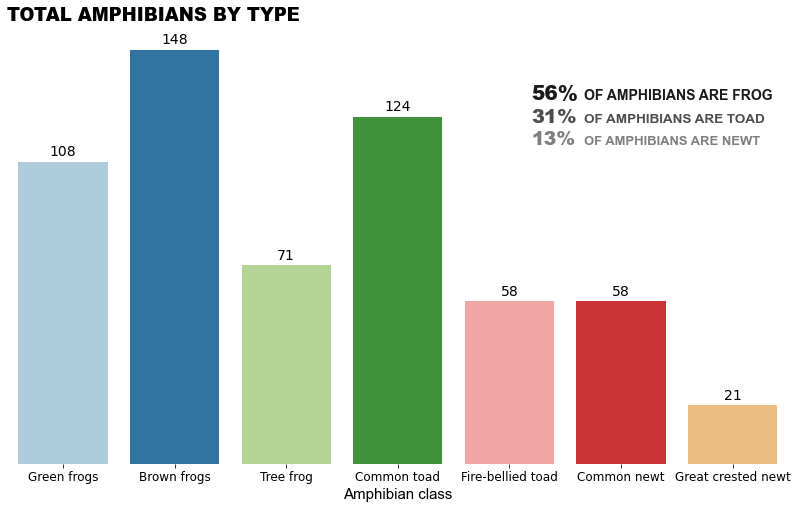

In [32]:
#Let's building a chart

plt.figure(figsize=(14,8))

ax = sns.barplot(data=amphibians_chart,x = "amphibian class", y = "Total", palette = "Paired",order=['Green frogs','Brown frogs','Tree frog','Common toad','Fire-bellied toad','Common newt','Great crested newt'])
csfont = {'fontname':'Arial'}
ax.set_title("TOTAL AMPHIBIANS BY TYPE", fontdict = {'fontsize':18,'fontweight':'heavy','fontstretch':'expanded'}, **csfont, loc='left', pad=8.0)
ax.set_xlabel("Amphibian class",fontdict = {'fontsize':15}, **csfont)
ax.set_ylabel("Total", fontdict={'fontsize' : 15},**csfont)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
label_size = 12
ax.tick_params(labelsize=label_size)


rank = ranking(amphibians_chart,'amphibian class','Total','frog','newt',"toad")

altura=130
color ='0.1'
fontsize_number = 20
fontsize_text = 14
for k,v in rank.items():
    label_text_perc = f"{v}%"
    ax.text(x=4.2,y=altura,s=label_text_perc,fontsize=fontsize_number,fontfamily=csfont['fontname'],fontweight='extra bold',color=color)
    label_text = f"OF AMPHIBIANS ARE {k.upper()}"
    ax.text(x=4.67,y=altura,s=label_text,fontsize=fontsize_text,fontfamily=csfont['fontname'],fontweight='semibold',color=color, fontvariant='small-caps')
    altura=altura-8
    color = str(float(color)+0.2)
    fontsize_number = fontsize_number-0.5
    fontsize_text = fontsize_text-0.5
    


#Annotate the bars with value
for p, v in zip(ax.patches, amphibians_chart.set_index('amphibian class').reindex(['Green frogs','Brown frogs','Tree frog','Common toad','Fire-bellied toad','Common newt','Great crested newt']).reset_index()['Total']): #arrumar a ordem  
 height = p.get_height() 
 ax.text(p.get_x() + p.get_width() / 2, height + 1, v, 
 ha='center', va='bottom', fontdict = {'fontsize':14}) 
plt.savefig("charts/Bar Plot by type of Amphibians.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
plt.show()




### 2.2.3 - Analysing OR Label by Type of Amphibian


#### 2.2.3.1 - Building the dataframe to analise the OR Label by Type of Amphibian

##### 2.2.3.1.1 - Selecting Varibles to df

In [33]:
# Selecting Varibles to df
or_labes_and_target_list = classification_target_list.copy()
or_labes_and_target_list.append('or_label')
df_or_label[classification_target_list]=df_or_label[classification_target_list].astype("int8")


df_or_label = df_or_label[or_labes_and_target_list]


##### 2.2.3.1.2 - Grouping by or label

In [34]:
#Grouping by or label
df_or_label_grouped = df_or_label.groupby('or_label').agg('sum')
df_or_label_grouped

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
or_label,,,,,,,
lack of access or poor access,5,3,6,1,4,2,0
large access to terrestrial habitats,85,118,92,49,56,48,18
low access,9,11,11,1,5,0,0
medium access,9,16,15,7,6,8,3


In [35]:
#df_or_label_grouped = df_or_label.groupby('or_label').agg('sum')
#df_or_label_grouped

In [36]:
df_or_label_grouped = (
    df_or_label_grouped
    .stack() #Here we have a serie with multindex
    .rename_axis(['or_label', 'amphibian class'])
   
    .reset_index(name='Total')
   
)
df_or_label_grouped

,or_label,amphibian class,Total
0,lack of access or poor access,Green frogs,5
1,lack of access or poor access,Brown frogs,3
2,lack of access or poor access,Common toad,6
3,lack of access or poor access,Fire-bellied toad,1
4,lack of access or poor access,Tree frog,4
5,lack of access or poor access,Common newt,2
6,lack of access or poor access,Great crested newt,0
7,large access to terrestrial habitats,Green frogs,85
8,large access to terrestrial habitats,Brown frogs,118
9,large access to terrestrial habitats,Common toad,92


In [37]:
order=['Green frogs','Brown frogs','Tree frog','Common toad','Fire-bellied toad','Common newt','Great crested newt']
new_grouped = df_or_label_grouped.groupby(['amphibian class','or_label'])["Total"].agg('sum').to_frame()

In [38]:
new_grouped

Total
amphibian class    or_label                                   
Brown frogs        lack of access or poor access             3
                   large access to terrestrial habitats    118
                   low access                               11
                   medium access                            16
Common newt        lack of access or poor access             2
                   large access to terrestrial habitats     48
                   low access                                0
                   medium access                             8
Common toad        lack of access or poor access             6
                   large access to terrestrial habitats     92
                   low access                               11
                   medium access                            15
Fire-bellied toad  lack of access or poor access             1
                   large access to terrestrial habitats     49
                   low access                                1
                   medium access                             7
Great crested newt lack of access or poor access             0
                   large access to terrestrial habitats     18
                   low access                                0
                   medium access                             3
Green frogs        lack of access or poor access             5
                   large access to terrestrial habitats     85
                   low access                                9
                   medium access                             9
Tree frog          lack of access or poor access             4
                   large access to terrestrial habitats     56
                   low access                                5
                   medium access                             6

In [39]:
new_df_or_label_grouped=new_grouped.reindex(level='amphibian class',labels=order).reset_index()
new_df_or_label_grouped

,amphibian class,or_label,Total
0,Green frogs,lack of access or poor access,5
1,Green frogs,large access to terrestrial habitats,85
2,Green frogs,low access,9
3,Green frogs,medium access,9
4,Brown frogs,lack of access or poor access,3
5,Brown frogs,large access to terrestrial habitats,118
6,Brown frogs,low access,11
7,Brown frogs,medium access,16
8,Tree frog,lack of access or poor access,4
9,Tree frog,large access to terrestrial habitats,56


#### 2.2.3.2 - Building the visualization by "OR labels" and "Type of Amphibian"

See the height attribute of each rectangle object

The first rectangle is Rectangle(xy=(-0.4, 0), width=0.2, height=5, angle=0) with the height 5.0
Rectangle(xy=(0.6, 0), width=0.2, height=3, angle=0)
3.0
Rectangle(xy=(1.6, 0), width=0.2, height=4, angle=0)
4.0
Rectangle(xy=(2.8, 0), width=0.2, height=92, angle=0)
92.0
The Rectangle object we could see that the bars are building following the or label classification, I mean this order: 

       amphibian class                       or_label  Total
0          Green frogs  lack of access or poor access      5
4          Brown frogs  lack of access or poor access      3
8            Tree frog  lack of access or poor access      4
12         Common toad  lack of access or poor access      6
16   Fire-bellied toad  lack of access or poor access      1
20         Common newt  lack of access or poor access      2
24  Great crested newt  lack of access or poor access      0

Following this order of index
[0, 4, 8, 12, 16, 20, 24]

Because it w

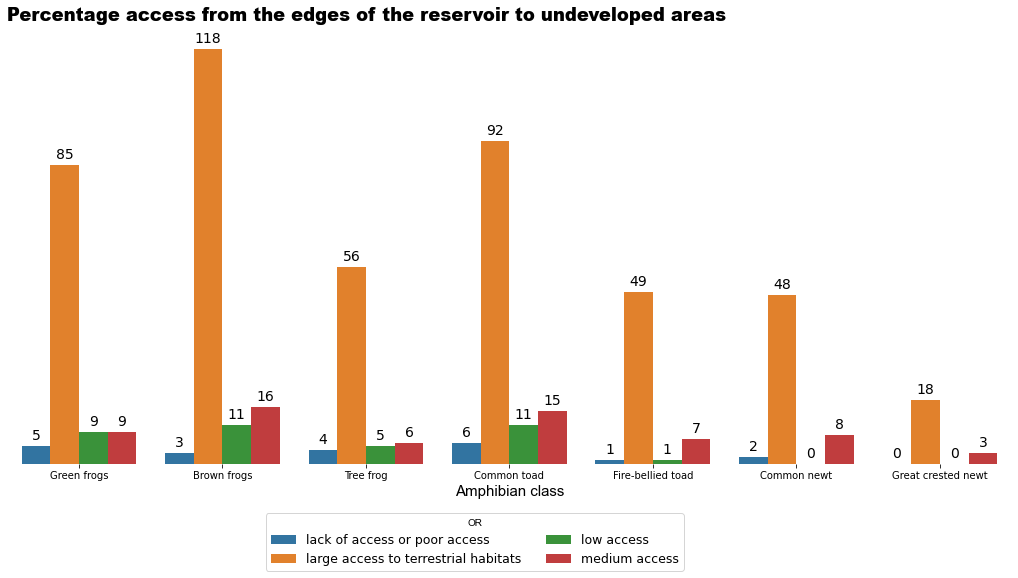

In [40]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x='amphibian class', y='Total', hue='or_label',
ax=ax, data=new_df_or_label_grouped)
csfont = {'fontname':'Arial'}
ax.set_title("Percentage access from the edges of the reservoir to undeveloped areas", fontdict = {'fontsize':18,'fontweight':'heavy','fontstretch':'expanded'}, **csfont, loc='left', pad=8.0)
ax.set_xlabel("Amphibian class",fontdict = {'fontsize':15}, **csfont)
ax.set_ylabel("Total", fontdict={'fontsize' : 15})
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(fontsize=12.5,title='OR',loc='best', bbox_to_anchor=(0.18, -0.6, 0.5, 0.5),ncol=2)
leg_title = ax.get_legend()
plt.setp(leg_title.get_title(), family='Arial')
#plt.setp(leg.get_texts(), family='Ubuntu Mono')

#Annotate the bars with value
#Reorganizar pois as colunas são montadas por tipo, não é a mesma ordem do df...usar df.reindex
# I identigy that each rectangle object if refeging to one or_label, but not in the same index of class. So to inset hte value in the top of
# each bar I need to identigy exatle one is.



print(f"See the height attribute of each rectangle object")
print()
print(f"The first rectangle is {ax.patches[0]} with the height {ax.patches[0].get_height()}")
#print(ax.patches[0].get_height())

print(ax.patches[1])
print(ax.patches[1].get_height())

print(ax.patches[2])
print(ax.patches[2].get_height())



print(ax.patches[10])
print(ax.patches[10].get_height())



print("The Rectangle object we could see that the bars are building following the or label classification, I mean this order: ")
lack_of_access_or_poor_access_filter = new_df_or_label_grouped.or_label == 'lack of access or poor access'
print()
print(new_df_or_label_grouped.loc[lack_of_access_or_poor_access_filter])
print()
print("Following this order of index")
#with the filter I know the exacle index, so I ill store it.
list_index_1 = new_df_or_label_grouped.loc[lack_of_access_or_poor_access_filter].index.to_list()
# the index order to the fister or_label criteria.
print(list_index_1)
print()


#Let's do that to the other ones.

#identify the index by filter each one
large_access_to_terrestrial_habitats_filter= new_df_or_label_grouped.or_label == 'large access to terrestrial habitats'
low_access_filter= new_df_or_label_grouped.or_label == 'low access'
medium_access_filter= new_df_or_label_grouped.or_label == 'medium access'

#store each
list_index_2 = new_df_or_label_grouped.loc[large_access_to_terrestrial_habitats_filter].index.to_list()
list_index_3 = new_df_or_label_grouped.loc[low_access_filter].index.to_list()
list_index_4 = new_df_or_label_grouped.loc[medium_access_filter].index.to_list()

#append each list

new_index_order = list_index_1 + list_index_2 + list_index_3 + list_index_4
new_index_order

print("Because it we built a function to label each one correctly")
#Ok now, I will reindex the indice to the correct label the bar
new_df_or_label_grouped_reindexed = new_df_or_label_grouped.reindex(new_index_order)
for p, v in zip(ax.patches, new_df_or_label_grouped_reindexed['Total']): 
    
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height + 1, v, 
    ha='center', va='bottom', fontdict = {'fontsize':14}) 

fig.savefig("charts/Bar Plot by type of Amphibians for OR.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
plt.show()



### 2.2.4 - Analysing RR and BR varibles by Type of Amphibian


#### 2.2.4.1 - Building the dataframe to analise the RR and BR varibles by Type of Amphibian

RR - minimum_distaces_from_water_reservoir_to_roads
BR - minimum_distance_to_buildings

##### 2.2.4.1.1 - Selecting Varibles to df

In [41]:

rr_br_labes_and_target_list = classification_target_list.copy()
rr_br_labes_and_target_list.append('minimum_distaces_from_water_reservoir_to_roads')
rr_br_labes_and_target_list.append('minimum_distance_to_buildings')
rr_br_labes_and_target_list.append('RR')
rr_br_labes_and_target_list.append('BR')
new_df_with_described_categories[classification_target_list]=new_df_with_described_categories[classification_target_list].astype("int8")


new_df_with_described_categories_minimus = new_df_with_described_categories[rr_br_labes_and_target_list]

In [42]:
new_df_with_described_categories_minimus

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,minimum_distaces_from_water_reservoir_to_roads,minimum_distance_to_buildings,RR,BR
0,0,0,0,0,0,0,0,<50 m,<50 m,0,0
1,0,1,1,0,0,1,0,50–100 m,50–100 m,1,1
2,0,1,1,0,0,1,0,50–100 m,50–100 m,1,1
3,0,0,1,0,0,0,0,<50 m,<50 m,0,0
4,0,1,1,1,0,1,1,<50 m,200–500 m,0,5
...,...,...,...,...,...,...,...,...,...,...,...
184,0,1,0,0,0,0,0,100–200 m,50–100 m,2,1
185,1,1,1,1,0,1,0,200–500 m,200–500 m,5,5
186,1,1,1,1,0,1,0,200–500 m,200–500 m,5,5
187,0,1,1,0,0,0,0,50–100 m,<50 m,1,0


In [43]:
#minimus = ['RR','BR']

#new_df_with_described_categories_minimus[minimus]=new_df_with_described_categories_minimus[minimus].astype('int16')


In [44]:
#new_df_with_described_categories_minimus

##### 2.2.3.1.2 - Grouping by RR and BR labels

In [45]:

new_df_with_described_categories_or_grouped = new_df_with_described_categories_minimus.groupby(['minimum_distaces_from_water_reservoir_to_roads','minimum_distance_to_buildings','RR','BR']).agg('sum')
new_df_with_described_categories_or_grouped

0                                                                                   Green frogs  \
minimum_distaces_from_water_reservoir_to_roads minimum_distance_to_buildings RR BR                
100–200 m                                      100–200 m                     2  2            11   
                                               200–500 m                     2  5             1   
                                               500–1000 m                    2  9             0   
                                               50–100 m                      2  1             8   
                                               <50 m                         2  0             2   
                                               >1000 m                       2  10            1   
200–500 m                                      100–200 m                     5  2             2   
                                               200–500 m                     5  5            22   
                                               500–1000 m                    5  9             0   
                                               50–100 m                      5  1             1   
                                               <50 m                         5  0             1   
                                               >1000 m                       5  10            0   
500–1000 m                                     200–500 m                     9  5             1   
                                               500–1000 m                    9  9             2   
50–100 m                                       100–200 m                     1  2             4   
                                               200–500 m                     1  5             2   
                                               50–100 m                      1  1            20   
                                               <50 m                         1  0             2   
<50 m                                          100–200 m                     0  2             1   
                                               200–500 m                     0  5             0   
                                               50–100 m                      0  1             8   
                                               <50 m                         0  0            15   
>1000 m                                        >1000 m                       10 10            4   

0                                                                                   Brown frogs  \
minimum_distaces_from_water_reservoir_to_roads minimum_distance_to_buildings RR BR                
100–200 m                                      100–200 m                     2  2            13   
                                               200–500 m                     2  5             4   
                                               500–1000 m                    2  9             1   
                                               50–100 m                      2  1             9   
                                               <50 m                         2  0             4   
                                               >1000 m                       2  10            1   
200–500 m                                      100–200 m                     5  2             2   
                                               200–500 m                     5  5            25   
                                               500–1000 m                    5  9             1   
                                               50–100 m                      5  1             1   
                                               <50 m                         5  0             2   
                                               >1000 m                       5  10            1   
500–1000 m                                     200–500 m                     9  5             2   
                                       

##### 2.2.4.1.2 - Stack the types of Amphibians

In [46]:
new_df_with_described_categories_or_grouped = (
    new_df_with_described_categories_or_grouped
    .stack() #Here we have a serie with multindex
    .rename_axis(['minimum_distaces_from_water_reservoir_to_roads', 'minimum_distance_to_buildings','RR','BR','amphibian class'])
   
    .reset_index(name='Total')
   
)
new_df_with_described_categories_or_grouped

,minimum_distaces_from_water_reservoir_to_roads,minimum_distance_to_buildings,RR,BR,amphibian class,Total
0,100–200 m,100–200 m,2,2,Green frogs,11
1,100–200 m,100–200 m,2,2,Brown frogs,13
2,100–200 m,100–200 m,2,2,Common toad,12
3,100–200 m,100–200 m,2,2,Fire-bellied toad,6
4,100–200 m,100–200 m,2,2,Tree frog,6
...,...,...,...,...,...,...
156,>1000 m,>1000 m,10,10,Common toad,3
157,>1000 m,>1000 m,10,10,Fire-bellied toad,1
158,>1000 m,>1000 m,10,10,Tree frog,2
159,>1000 m,>1000 m,10,10,Common newt,1


##### 2.2.4.1.3 - Grouping by Amphibians RR and BR varibles


In [47]:
order=['Green frogs','Brown frogs','Tree frog','Common toad','Fire-bellied toad','Common newt','Great crested newt']
new_grouped_minimum = new_df_with_described_categories_or_grouped.groupby(['amphibian class','minimum_distaces_from_water_reservoir_to_roads','minimum_distance_to_buildings','RR','BR'])["Total"].agg('sum').to_frame()
new_grouped_minimum

Total
amphibian class minimum_distaces_from_water_reservoir_to_roads minimum_distance_to_buildings RR BR       
Brown frogs     100–200 m                                      100–200 m                     2  2      13
                                                               200–500 m                     2  5       4
                                                               500–1000 m                    2  9       1
                                                               50–100 m                      2  1       9
                                                               <50 m                         2  0       4
...                                                                                                   ...
Tree frog       <50 m                                          100–200 m                     0  2       0
                                                               200–500 m                     0  5       0
                                                               50–100 m                      0  1       6
                                                               <50 m                         0  0      11
                >1000 m                                        >1000 m                       10 10      2

[161 rows x 1 columns]

##### 2.2.4.1.4 - Reindex by new order of Amphibians type and reset the index

In [48]:
new_grouped_minimum=new_grouped_minimum.reindex(level='amphibian class',labels=order)
new_grouped_minimum

Total
amphibian class    minimum_distaces_from_water_reservoir_to_roads minimum_distance_to_buildings RR BR       
Green frogs        100–200 m                                      100–200 m                     2  2      11
                                                                  200–500 m                     2  5       1
                                                                  500–1000 m                    2  9       0
                                                                  50–100 m                      2  1       8
                                                                  <50 m                         2  0       2
...                                                                                                      ...
Great crested newt <50 m                                          100–200 m                     0  2       0
                                                                  200–500 m                     0  5       1
                                                                  50–100 m                      0  1       2
                                                                  <50 m                         0  0       2
                   >1000 m                                        >1000 m                       10 10      0

[161 rows x 1 columns]

##### 2.2.4.1.5 - Reindex the order by minimum distances from water reservior to roads  

In [49]:
order_of_minimus = ['<50 m','50–100 m','100–200 m','200–500 m','500–1000 m']

In [50]:
new_grouped_minimum=new_grouped_minimum.reindex(level='minimum_distaces_from_water_reservoir_to_roads',labels=order_of_minimus)
new_grouped_minimum

Total
amphibian class    minimum_distaces_from_water_reservoir_to_roads minimum_distance_to_buildings RR BR       
Green frogs        <50 m                                          100–200 m                     0  2       1
                                                                  200–500 m                     0  5       0
                                                                  50–100 m                      0  1       8
                                                                  <50 m                         0  0      15
                   50–100 m                                       100–200 m                     1  2       4
...                                                                                                      ...
Great crested newt 200–500 m                                      50–100 m                      5  1       0
                                                                  <50 m                         5  0       0
                                                                  >1000 m                       5  10      0
                   500–1000 m                                     200–500 m                     9  5       0
                                                                  500–1000 m                    9  9       0

[154 rows x 1 columns]

##### 2.2.4.1.6 - Reindex the order by minimum distances to builds 

In [51]:
new_grouped_minimum=new_grouped_minimum.reindex(level='minimum_distance_to_buildings',labels=order_of_minimus).reset_index()
new_grouped_minimum

,amphibian class,minimum_distaces_from_water_reservoir_to_roads,minimum_distance_to_buildings,RR,BR,Total
0,Green frogs,<50 m,<50 m,0,0,15
1,Green frogs,<50 m,50–100 m,0,1,8
2,Green frogs,<50 m,100–200 m,0,2,1
3,Green frogs,<50 m,200–500 m,0,5,0
4,Green frogs,50–100 m,<50 m,1,0,2
...,...,...,...,...,...,...
135,Great crested newt,200–500 m,100–200 m,5,2,0
136,Great crested newt,200–500 m,200–500 m,5,5,5
137,Great crested newt,200–500 m,500–1000 m,5,9,0
138,Great crested newt,500–1000 m,200–500 m,9,5,0


##### 2.2.4.1.7 - Checking the values of df for Minimum distances from water reservior to roads


In [52]:
_lessthen50m= new_grouped_minimum.minimum_distaces_from_water_reservoir_to_roads == '<50 m'
new_grouped_minimum[_lessthen50m]

,amphibian class,minimum_distaces_from_water_reservoir_to_roads,minimum_distance_to_buildings,RR,BR,Total
0,Green frogs,<50 m,<50 m,0,0,15
1,Green frogs,<50 m,50–100 m,0,1,8
2,Green frogs,<50 m,100–200 m,0,2,1
3,Green frogs,<50 m,200–500 m,0,5,0
20,Brown frogs,<50 m,<50 m,0,0,17
21,Brown frogs,<50 m,50–100 m,0,1,12
22,Brown frogs,<50 m,100–200 m,0,2,3
23,Brown frogs,<50 m,200–500 m,0,5,2
40,Tree frog,<50 m,<50 m,0,0,11
41,Tree frog,<50 m,50–100 m,0,1,6


##### 2.2.4.1.8 Adding the new column "type_amphibian" to df

In [53]:
new_grouped_minimum = new_grouped_minimum.rename(columns={'amphibian class':'amphibian_class'})
new_df_grouped_minimum =new_grouped_minimum.assign(type_amphibian = new_grouped_minimum.apply(tipo,axis=1))

In [54]:
new_df_grouped_minimum 

,amphibian_class,minimum_distaces_from_water_reservoir_to_roads,minimum_distance_to_buildings,RR,BR,Total,type_amphibian
0,Green frogs,<50 m,<50 m,0,0,15,Frogs
1,Green frogs,<50 m,50–100 m,0,1,8,Frogs
2,Green frogs,<50 m,100–200 m,0,2,1,Frogs
3,Green frogs,<50 m,200–500 m,0,5,0,Frogs
4,Green frogs,50–100 m,<50 m,1,0,2,Frogs
...,...,...,...,...,...,...,...
135,Great crested newt,200–500 m,100–200 m,5,2,0,Newts
136,Great crested newt,200–500 m,200–500 m,5,5,5,Newts
137,Great crested newt,200–500 m,500–1000 m,5,9,0,Newts
138,Great crested newt,500–1000 m,200–500 m,9,5,0,Newts


#### 2.2.4.2 - Building the visualization by RR and BR varibles by Type of Amphibian

##### 2.2.4.2.1- Renaming the amphibians_class column

In [55]:
#This rename is necessary to work with itertuples. With this new name the class will be easy identify in the tuples. So we can correctly iterater over it.
new_df_grouped_minimum.rename({"amphibian class":"amphibian_class"})

,amphibian_class,minimum_distaces_from_water_reservoir_to_roads,minimum_distance_to_buildings,RR,BR,Total,type_amphibian
0,Green frogs,<50 m,<50 m,0,0,15,Frogs
1,Green frogs,<50 m,50–100 m,0,1,8,Frogs
2,Green frogs,<50 m,100–200 m,0,2,1,Frogs
3,Green frogs,<50 m,200–500 m,0,5,0,Frogs
4,Green frogs,50–100 m,<50 m,1,0,2,Frogs
...,...,...,...,...,...,...,...
135,Great crested newt,200–500 m,100–200 m,5,2,0,Newts
136,Great crested newt,200–500 m,200–500 m,5,5,5,Newts
137,Great crested newt,200–500 m,500–1000 m,5,9,0,Newts
138,Great crested newt,500–1000 m,200–500 m,9,5,0,Newts


##### 2.2.4.2.2- Checking the types of columns

In [56]:
new_df_grouped_minimum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   amphibian_class                                 140 non-null    object
 1   minimum_distaces_from_water_reservoir_to_roads  140 non-null    object
 2   minimum_distance_to_buildings                   140 non-null    object
 3   RR                                              140 non-null    object
 4   BR                                              140 non-null    object
 5   Total                                           140 non-null    int8  
 6   type_amphibian                                  140 non-null    object
dtypes: int8(1), object(6)
memory usage: 6.8+ KB


##### 2.2.4.2.3- Changing the varible types or RR and BR varibles

In [57]:
#At least we see numbers, the RR varible represents categories. 
new_df_grouped_minimum.RR.unique()

array(['0', '1', '2', '5', '9'], dtype=object)

In [58]:
#We will keep it as numbers then we can work with relplot chart
new_df_grouped_minimum["RR"]=new_df_grouped_minimum["RR"].astype('int8')

In [59]:
#Verify transformation
new_df_grouped_minimum.RR.unique()

array([0, 1, 2, 5, 9], dtype=int8)

In [60]:
#At least we see numbers, the BB varible represents categories. 
#We will keep it as numbers then we can work with relplot chart
new_df_grouped_minimum["BR"]=new_df_grouped_minimum["BR"].astype('int8')

In [61]:
#Verify transformation
new_df_grouped_minimum.BR.unique()

array([0, 1, 2, 5, 9], dtype=int8)

##### 2.2.4.2.4 - Building the Relplot chart type Scatterplot

Figure(1178.88x360)
Figure(836.5x360)
Figure(851.625x360)


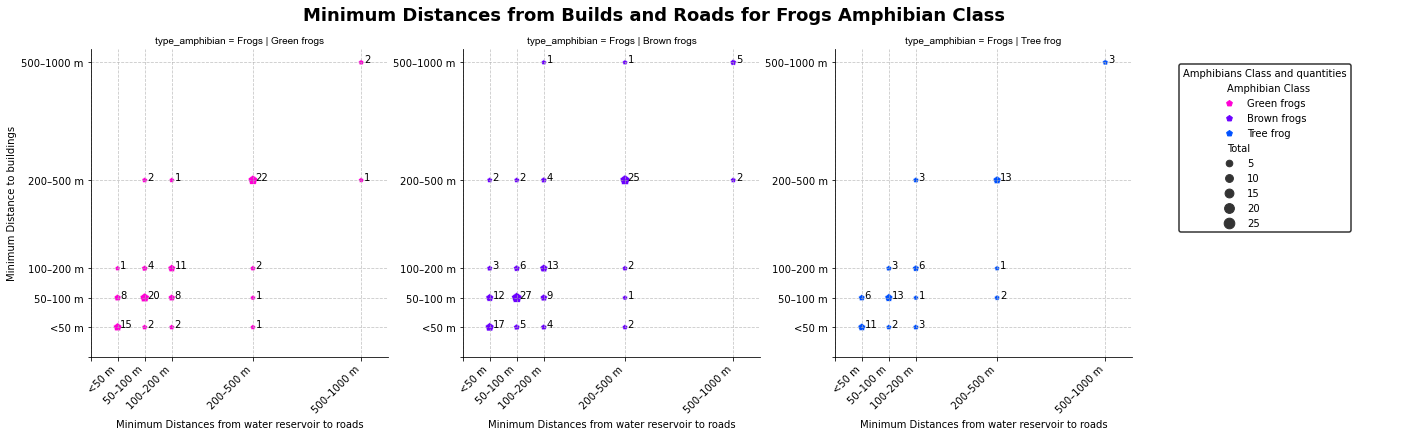

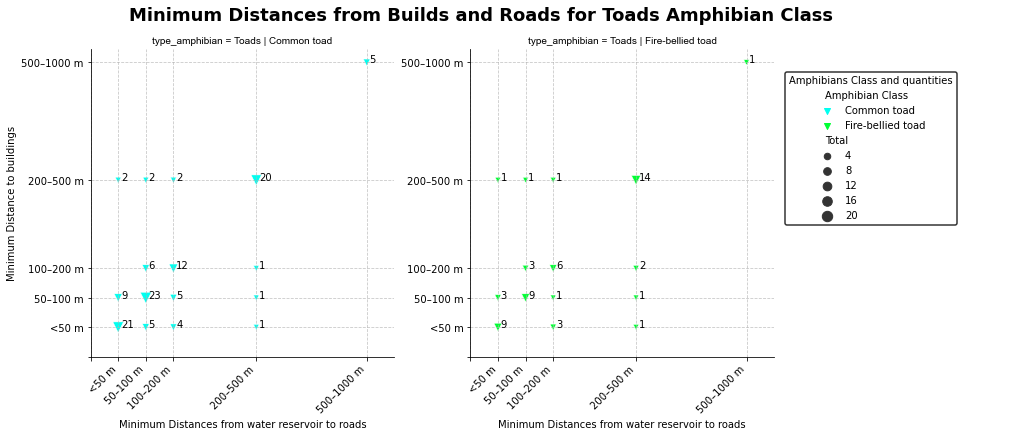

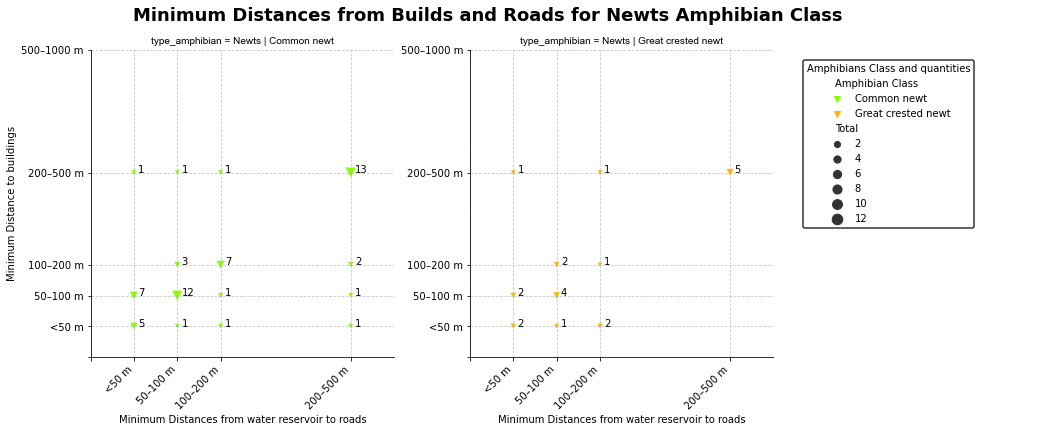

In [62]:

###TESTER###
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec


# Building a new dataframe without 0 in total column
new_df_grouped_minimum = new_df_grouped_minimum.rename(
    columns={"amphibian class":"amphibian_class"}
)
new_df_grouped_minimum_filtered = new_df_grouped_minimum[new_df_grouped_minimum['Total'] != 0]
frogs_filter = new_df_grouped_minimum_filtered["amphibian_class"].str.contains("Frogs") 

#identyfing the subplot position
plotnum = {'Green frogs': 0, 'Brown frogs': 1, 
           'Tree frog': 2,'Common toad':3,'Fire-bellied toad':4,
           'Common newt':5,'Great crested newt':6}

# Define a color palette for amphibian classes
palette = sns.color_palette("hsv_r", len(plotnum))

#Defining the dataframes
data_frog = new_df_grouped_minimum_filtered[new_df_grouped_minimum_filtered["amphibian_class"].str.contains("frog")]
data_toad = new_df_grouped_minimum_filtered[new_df_grouped_minimum_filtered["amphibian_class"].str.contains("toad")]
data_newt = new_df_grouped_minimum_filtered[new_df_grouped_minimum_filtered["amphibian_class"].str.contains("newt")]


res1 = sns.relplot(
    x="RR",
    y="BR",
    data= data_frog,
    hue="amphibian_class",
    size="Total",
    height=5,
    col="amphibian_class",
    col_order=order[:3],
    #col_wrap=2,
    row = "type_amphibian",
    style="amphibian_class",
    markers=["p", "p", "p"],
    sizes=(30, 120),
    legend="brief",
    facet_kws={'sharex':'row','sharey': 'col'},
    palette=palette[:3],  # Apply the defined color palette
    #ax=axs[0]
    )

fig1 = res1.fig
print(fig1)

# Adicione o segundo relplot com 2 colunas

res2 = sns.relplot(
    x="RR",
    y="BR",
    data=data_toad,
    hue="amphibian_class",
    size="Total",
    height=5,
    col="amphibian_class",
    col_order=order[3:5],
    #col_wrap=2,
    row = "type_amphibian",
    style="amphibian_class",
    markers=["v", "v"],
    sizes=(30, 120),
    legend="brief",
    facet_kws={'sharex':'row','sharey': 'col'},
    palette=palette[3:5], # Apply the defined color palette
   
   
)

fig2 = res2.fig
print(fig2)

res3 = sns.relplot(
    x="RR",
    y="BR",
    data=data_newt,
    hue="amphibian_class",
    size="Total",
    height=5,
    col="amphibian_class",
    col_order=order[5:],
    #col_wrap=2,
    row = "type_amphibian",
    style="amphibian_class",
    markers=["v", "v"],
    sizes=(30, 120),
    legend="brief",
    facet_kws={'sharex':'row','sharey': 'col'},
    palette=palette[5:],  # Apply the defined color palette
    #ax=axs[2]
)

fig3 = res3.fig
print(fig3)



#Varibles to definy the ticks marks on axis x and y.
max_x = new_df_grouped_minimum.RR.unique()
max_x_comp = np.insert(max_x,0,-1)

max_y = new_df_grouped_minimum.BR.unique()
max_y_comp = np.insert(max_y,0,-1)


# Loop through each subplot for further customization if needed

res_list = [res1, res2, res3]
#for res in res_list:
# Loop through each subplot for further customization if needed

# Loop through each subplot for title customization 
for i in res_list:
    # Customize plot aesthetics
    i.set_axis_labels(
    'Minimum Distances from water reservoir to roads', 
                    'Minimum Distance to buildings')
    
    if i.data["type_amphibian"].unique()=="Frogs":
        classe = "Frogs"
    elif i.data["type_amphibian"].unique()=="Toads":
        classe = "Toads"
    elif i.data["type_amphibian"].unique()=="Newts":
        classe = "Newts"
    
    i.fig.suptitle(
    f'Minimum Distances from Builds and Roads for {classe} Amphibian Class', 
    y=1.05, 
    fontsize=18, 
    fontweight='heavy', 
    fontstretch='expanded')
    i.set_titles(col_template="{col_name}",font='Arial', fontsize=14)

    
    for ax in i.axes.flat:
        # Add grid lines
        ax.grid(True, linestyle='--', alpha=0.7)
        
# Loop through each subplot for further customization 

for res in res_list:
    for ax in res.axes.flat:
        # Add grid lines
        ax.grid(True, linestyle='--', alpha=0.7)
    
# Loop through each subplot to give annotatio to each point

for res in res_list:
    total_subplots = len(res.axes.flat)    
    subplot_position = 0
    while total_subplots > subplot_position:

        if res.data["type_amphibian"].unique()=="Frogs":
            df = data_frog
        elif res.data["type_amphibian"].unique()=="Toads":
            df = data_toad
        elif res.data["type_amphibian"].unique()=="Newts":
            df = data_newt
        
        for row in df.itertuples():
            if res.col_names[subplot_position] == row.amphibian_class:
                x = row[4]
                y = row[5]
                text = row[6]
                axt = res.axes.flat[subplot_position]
                axt.text(x+0.1,y,text, horizontalalignment='left')
          
        subplot_position =  subplot_position+1    
    
    
    #Loop to iterate over each subplot customazing the axis labels
    for ax in res.axes.flat:
        #Defining the ticks marks
        ax.set_xticks(max_x_comp)
        ax.set_yticks(max_y_comp)
    
        #Defining axis x limit, we make it a little big to insert the annotation over each dot.
        ax.set_xlim(-1, int(max(df["RR"]+1)))
    
        #Personalizing the x and y ticks labels
        xticks = ax.get_xticks()
        xticklabels = ['' if x == -1 else
                   '<50 m' if x == 0 else
                   '50–100 m' if x== 1 else 
                   '100–200 m' if x == 2 else 
                   '200–500 m' if x == 5 else 
                   '500–1000 m' if x== 9 else 
                   '>1000 m' if x == 10 else 
                   str(x) for x in xticks]
    
        ax.set_xticklabels(xticklabels,rotation=45, ha='right')
    
        yticks = ax.get_yticks()
        yticklabels = ['' if x == -1 else
                   '<50 m' if x == 0 else
                   '50–100 m' if x== 1 else 
                   '100–200 m' if x == 2 else 
                   '200–500 m' if x == 5 else 
                   '500–1000 m' if x== 9 else 
                   '>1000 m' if x == 10 else str(x) for x in xticks]
        ax.set_yticklabels(yticklabels)
    
    # Ajusting spaces between subplosts
    res.fig.subplots_adjust(hspace=1.0)
    res.fig.subplots_adjust(wspace=0.25)

    # Customize the legend
    legend = res._legend  # Get a reference to the legend

    # Altere o texto do primeiro item da legenda
    handles, labels = legend.legendHandles, legend.get_texts()
    labels[0].set_text("Amphibian Class")

    # Add a border around the legend

    legend.set_title("Amphibians Class and quantities")
    legend.set_bbox_to_anchor((1.15, 0.80))  # Adjust the legend position
    legend.set_frame_on(True)
    legend.get_frame().set_linewidth(1.5)  # Set the border width
    legend.get_frame().set_edgecolor("black")  # Set the border color
    

    



fig.subplots_adjust(hspace=0.5)
res1.savefig("charts/Minimum Distances Frogs.png", transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
res2.savefig("charts/Minimum Distances Toads.png", transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
res3.savefig("charts/Minimum Distances Newts.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
# Exiba o gráfico
plt.show()


In [63]:
class Formating:
    
    
    
    @staticmethod
    def defining_the_ticks_marcks():
        #Varibles to definy the ticks marks on axis x and y.
        max_x = new_df_grouped_minimum.RR.unique()
        max_x_comp = np.insert(max_x,0,-1)

        max_y = new_df_grouped_minimum.BR.unique()
        max_y_comp = np.insert(max_y,0,-1)
        return  max_x_comp, max_y_comp
   
    @staticmethod
    def axis_subplot_label_customization(relplots_list,supertitle,xlabel=None,ylabel=None,change_axis_label=False):
    # Loop through each subplot for title customization 
        
        for i in relplots_list:
            # Customize plot aesthetics
            if change_axis_label == True:
                i.set_axis_labels(
                    xlabel, ylabel)

            if i.data["type_amphibian"].unique()=="Frogs":
                classe = "Frogs"
            elif i.data["type_amphibian"].unique()=="Toads":
                classe = "Toads"
            elif i.data["type_amphibian"].unique()=="Newts":
                classe = "Newts"

            i.fig.suptitle(
            f'{supertitle} - {classe}', 
            y=1.05, 
            fontsize=18, 
            fontweight='heavy', 
            fontstretch='expanded')
            i.set_titles(col_template="{col_name}",font='Arial', fontsize=14)
    @staticmethod
    def axis_grid_customization(relplots_list):
    # Loop through each subplot for further customization 

        for res in relplots_list:
            for ax in res.axes.flat:
                # Add grid lines
                ax.grid(True, linestyle='--', alpha=0.7)

    
    @staticmethod
    def insert_annotation_to_each_dot(relplots_list):
        # Loop through each subplot to give annotatio to each point
        for res in relplots_list:
            total_subplots = len(res.axes.flat)    
            subplot_position = 0
            while total_subplots > subplot_position:

                if res.data["type_amphibian"].unique()=="Frogs":
                    df = data_frog
                elif res.data["type_amphibian"].unique()=="Toads":
                    df = data_toad
                elif res.data["type_amphibian"].unique()=="Newts":
                    df = data_newt

                for row in df.itertuples():
                    if res.col_names[subplot_position] == row.amphibian_class:
                        x = row[4]
                        y = row[5]
                        text = row[6]
                        axt = res.axes.flat[subplot_position]
                        axt.text(x+0.1,y,text, horizontalalignment='left')

                subplot_position =  subplot_position+1    
    
    @staticmethod
    def customizing_ticks_marks(relplots_list):
        #Loop to iterate over each subplot customazing the axis labels
        
        max_x_comp,max_y_comp = Formating.defining_the_ticks_marcks()
                
        for res in relplots_list:
            for ax in res.axes.flat:
                #Defining the ticks marks
                ax.set_xticks(max_x_comp)
                ax.set_yticks(max_y_comp)
    
                #Defining axis x limit, we make it a little big to insert the annotation over each dot.
                ax.set_xlim(int(min(max_x_comp)), int(max(max_x_comp+1)))
                ax.set_ylim(int(min(max_y_comp)), int(max(max_y_comp+1)))

                #Personalizing the x and y ticks labels
                xticks = ax.get_xticks()
                xticklabels = ['' if x == -1 else
                           '<50 m' if x == 0 else
                           '50–100 m' if x== 1 else 
                           '100–200 m' if x == 2 else 
                           '200–500 m' if x == 5 else 
                           '500–1000 m' if x== 9 else 
                           '>1000 m' if x == 10 else str(x) for x in xticks]

                ax.set_xticklabels(xticklabels,rotation=45, ha='right')

                yticks = ax.get_yticks()
                yticklabels = ['' if y == -1 else
                           '<50 m' if y == 0 else
                           '50–100 m' if y== 1 else 
                           '100–200 m' if y == 2 else 
                           '200–500 m' if y == 5 else 
                           '500–1000 m' if y== 9 else 
                           '>1000 m' if y == 10 else str(y) for y in yticks]
                ax.set_yticklabels(yticklabels)
   
    @staticmethod        
    def adjusting_spaces_between_subplots(relplots_list):
        # Ajusting spaces between subplosts
        for res in relplots_list:
            res.fig.subplots_adjust(hspace=1.0)
            res.fig.subplots_adjust(wspace=0.25)

    @staticmethod
    def customizing_the_legend(relplots_list,simple_title=None,supertitle=None,dots_size = None):
        # Customize the legend
        
        for res in relplots_list:
        
            legend = res._legend  # Get a reference to the legend
            
           
            if dots_size != None:
                
                # Altere o texto do primeiro item da legenda
                handles, labels = legend.legendHandles, legend.get_texts()
                labels[0].set_text(simple_title)
            
            
            if supertitle != None:
           
                legend.set_title(supertitle)

            # Add a border around the legend
            
            legend.set_bbox_to_anchor((1.15, 0.80))  # Adjust the legend position
            legend.set_frame_on(True)
            legend.get_frame().set_linewidth(1.5)  # Set the border width
            legend.get_frame().set_edgecolor("black")  # Set the border color
    

  


In [64]:
Formating.defining_the_ticks_marcks()

(array([-1,  0,  1,  2,  5,  9], dtype=int8),
 array([-1,  0,  1,  2,  5,  9], dtype=int8))

Figure(1178.88x360)
Figure(836.5x360)
Figure(851.625x360)


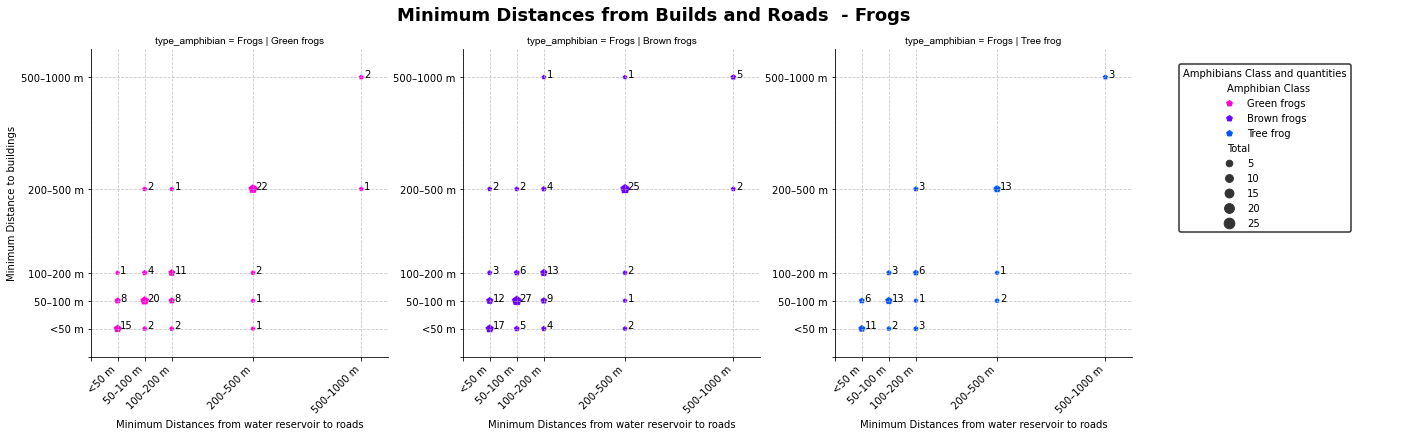

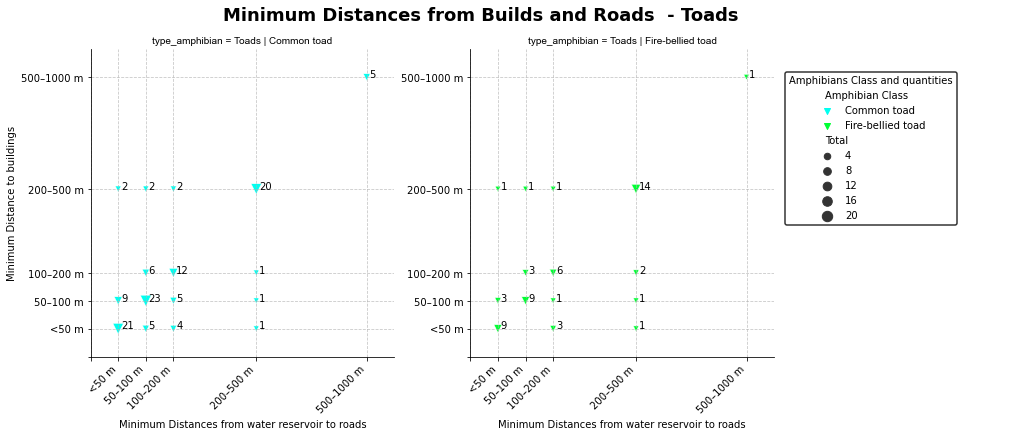

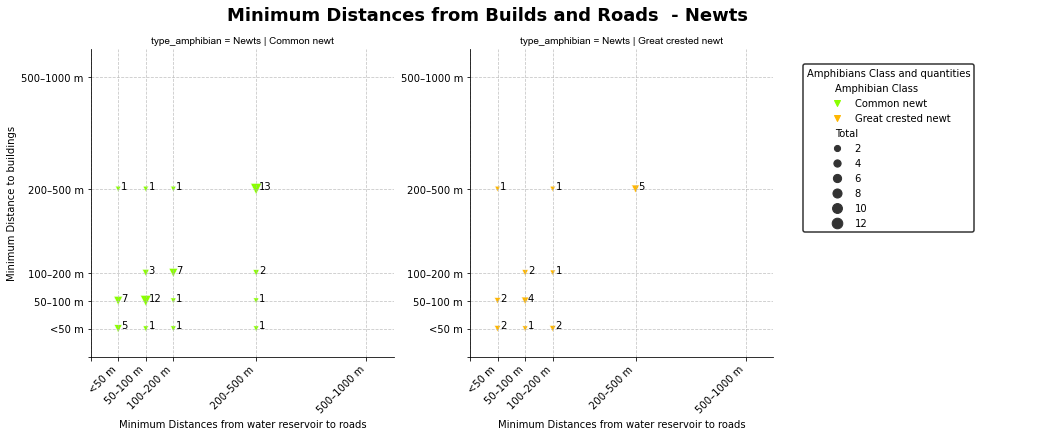

In [65]:

###TESTER class###
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec


# Building a new dataframe without 0 in total column
new_df_grouped_minimum = new_df_grouped_minimum.rename(
    columns={"amphibian class":"amphibian_class"}
)
new_df_grouped_minimum_filtered = new_df_grouped_minimum[new_df_grouped_minimum['Total'] != 0]
frogs_filter = new_df_grouped_minimum_filtered["amphibian_class"].str.contains("Frogs") 

#identyfing the subplot position
plotnum = {'Green frogs': 0, 'Brown frogs': 1, 
           'Tree frog': 2,'Common toad':3,'Fire-bellied toad':4,
           'Common newt':5,'Great crested newt':6}

# Define a color palette for amphibian classes
palette = sns.color_palette("hsv_r", len(plotnum))

#Defining the dataframes
data_frog = new_df_grouped_minimum_filtered[new_df_grouped_minimum_filtered["amphibian_class"].str.contains("frog")]
data_toad = new_df_grouped_minimum_filtered[new_df_grouped_minimum_filtered["amphibian_class"].str.contains("toad")]
data_newt = new_df_grouped_minimum_filtered[new_df_grouped_minimum_filtered["amphibian_class"].str.contains("newt")]

size = "Total"

res1 = sns.relplot(
    x="RR",
    y="BR",
    data= data_frog,
    hue="amphibian_class",
    size=size,
    height=5,
    col="amphibian_class",
    col_order=order[:3],
    #col_wrap=2,
    row = "type_amphibian",
    style="amphibian_class",
    markers=["p", "p", "p"],
    sizes=(30, 120),
    legend="brief",
    facet_kws={'sharex':'row','sharey': 'col'},
    palette=palette[:3],  # Apply the defined color palette
    #ax=axs[0]
    )

fig1 = res1.fig
print(fig1)

# Adicione o segundo relplot com 2 colunas

res2 = sns.relplot(
    x="RR",
    y="BR",
    data=data_toad,
    hue="amphibian_class",
    size=size,
    height=5,
    col="amphibian_class",
    col_order=order[3:5],
    #col_wrap=2,
    row = "type_amphibian",
    style="amphibian_class",
    markers=["v", "v"],
    sizes=(30, 120),
    legend="brief",
    facet_kws={'sharex':'row','sharey': 'col'},
    palette=palette[3:5], # Apply the defined color palette
   
   
)

fig2 = res2.fig
print(fig2)

res3 = sns.relplot(
    x="RR",
    y="BR",
    data=data_newt,
    hue="amphibian_class",
    size=size,
    height=5,
    col="amphibian_class",
    col_order=order[5:],
    #col_wrap=2,
    row = "type_amphibian",
    style="amphibian_class",
    markers=["v", "v"],
    sizes=(30, 120),
    legend="brief",
    facet_kws={'sharex':'row','sharey': 'col'},
    palette=palette[5:],  # Apply the defined color palette
    #ax=axs[2]
)

fig3 = res3.fig
print(fig3)

res_list = [res1, res2, res3]


Formating.axis_subplot_label_customization(
    res_list, 
    supertitle='Minimum Distances from Builds and Roads ', 
    xlabel ='Minimum Distances from water reservoir to roads', 
    ylabel= 'Minimum Distance to buildings',
    change_axis_label=True,
)
Formating.axis_grid_customization(res_list)
Formating.insert_annotation_to_each_dot(res_list)
Formating.customizing_ticks_marks(res_list)
Formating.adjusting_spaces_between_subplots(res_list)
Formating.customizing_the_legend(
    res_list, 
    simple_title="Amphibian Class",
    supertitle= "Amphibians Class and quantities",
    dots_size = size)

res1.savefig("charts/Minimum Distances Frogs.png", transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
res2.savefig("charts/Minimum Distances Toads.png", transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
res3.savefig("charts/Minimum Distances Newts.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
# Exiba o gráfico
plt.show()



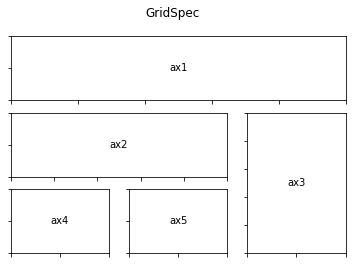

In [66]:
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure()

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

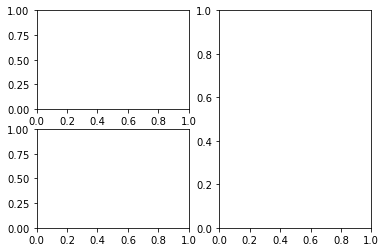

In [67]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
# spans two rows:
ax3 = fig.add_subplot(gs[:, 1])

### 2.2.5 - Analysing NR varible by Type of Amphibian

#### 2.2.5.1 - Building the dataframe to analise the NR varible by Type of Amphibian

##### 2.2.5.1.1 - Selecting Varibles to df

In [68]:
df_tranf_heads['NR']=df_tranf_heads['NR'].astype('int8')
list_with_nr = classification_target_list.copy()
list_with_nr.append('NR')
nr = df_tranf_heads[list_with_nr]
nr

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,NR
0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,1,0,1
2,0,1,1,0,0,1,0,1
3,0,0,1,0,0,0,0,1
4,0,1,1,1,0,1,1,2
...,...,...,...,...,...,...,...,...
184,0,1,0,0,0,0,0,1
185,1,1,1,1,0,1,0,1
186,1,1,1,1,0,1,0,1
187,0,1,1,0,0,0,0,1


##### 2.2.5.1.2 - Grouping by NR varible

In [69]:
nr_grouped = nr.groupby('NR')[classification_target_list].agg('sum')
nr_grouped

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
NR,,,,,,,
1,75,114,90,41,52,41,12
2,14,16,16,6,7,9,6
3,6,7,7,4,4,3,1
4,3,4,4,3,2,1,0
5,3,2,1,1,1,0,0
6,3,1,3,0,1,0,0
7,1,1,0,0,1,1,0
9,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1


##### 2.2.5.1.3 - Stack the types of Amphibians

In [70]:
new_nr_grouped = (
    nr_grouped
    .stack() #Here we have a serie with multindex
    .rename_axis(['NR','amphibian class'])
   
    .reset_index(name='Total')
   
)
new_nr_grouped 

,NR,amphibian class,Total
0,1,Green frogs,75
1,1,Brown frogs,114
2,1,Common toad,90
3,1,Fire-bellied toad,41
4,1,Tree frog,52
...,...,...,...
65,12,Common toad,1
66,12,Fire-bellied toad,1
67,12,Tree frog,1
68,12,Common newt,1


##### 2.2.5.1.4 - Replacing 0 for NAN values

In [71]:
new_nr_grouped_nan = (
    nr
    .set_index('NR')
    .stack() #Here we have a serie with multindex
    .rename_axis(['NR','amphibian class'])
   
    .reset_index(name='Status')
   
)
new_nr_grouped_nan = new_nr_grouped_nan.replace(0, np.nan)

In [72]:
new_nr_grouped_nan

,NR,amphibian class,Status
0,1,Green frogs,NaN
1,1,Brown frogs,NaN
2,1,Common toad,NaN
3,1,Fire-bellied toad,NaN
4,1,Tree frog,NaN
...,...,...,...
1318,1,Common toad,1.0
1319,1,Fire-bellied toad,NaN
1320,1,Tree frog,NaN
1321,1,Common newt,NaN


In [73]:
new_nr_grouped_nan.dropna(axis=0, inplace=True)

In [74]:
new_nr_grouped_nan

,NR,amphibian class,Status
8,1,Brown frogs,1.0
9,1,Common toad,1.0
12,1,Common newt,1.0
15,1,Brown frogs,1.0
16,1,Common toad,1.0
...,...,...,...
1307,1,Common newt,1.0
1310,1,Brown frogs,1.0
1311,1,Common toad,1.0
1317,1,Brown frogs,1.0


##### 2.2.5.1.5 - Building the Violin plot by Amphibian type and NR varible

<AxesSubplot:xlabel='amphibian class', ylabel='NR'>

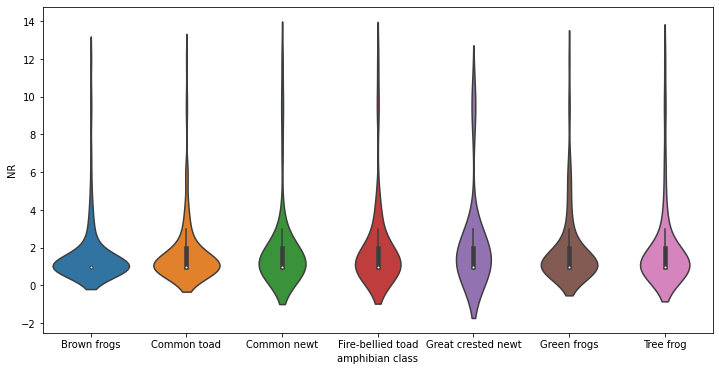

In [75]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(y='NR',x='amphibian class',data=new_nr_grouped_nan,orient='v')


In [76]:
new_nr_grouped['NR'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 12], dtype=int64)

### 2.2.6 - Analysing NR and SR varibles by Type of Amphibian

#### 2.2.6.1 - Building the dataframe to analise the NR and SR varible by Type of Amphibian

In [77]:
stacking_df_tranf_heads_SR_NR = (
        df_tranf_heads[
            ['SR','NR','Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog']]
        .set_index(['SR','NR'])
        .replace(0,np.nan) # replacing yhe no presence of amphibians type with nan value
        .stack() #stacking the labels of amphibians classes
        .reset_index(name='The Presence') #renaming the new column
        .rename(
            columns={0:'amphibian_class','SR':
                         'Surface of the water reservoir [m2]',
                     'NR':'Number of water reservoirs in habita'}
        ) #renaming the columns of amphibians
        
    
    )
stacking_df_tranf_heads_SR_NR

,Surface of the water reservoir [m2],Number of water reservoirs in habita,amphibian_class,The Presence
0,700,1,Brown frogs,1.0
1,700,1,Common newt,1.0
2,700,1,Common toad,1.0
3,200,1,Brown frogs,1.0
4,200,1,Common newt,1.0
...,...,...,...,...
583,500,1,Green frogs,1.0
584,300,1,Brown frogs,1.0
585,300,1,Common toad,1.0
586,300,1,Brown frogs,1.0


In [78]:
stacking_df_tranf_heads_SR_NR.shape

(588, 4)

In [79]:
stacking_df_tranf_heads_SR_NR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Surface of the water reservoir [m2]   588 non-null    object 
 1   Number of water reservoirs in habita  588 non-null    int64  
 2   amphibian_class                       588 non-null    object 
 3   The Presence                          588 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.5+ KB


In [80]:
stacking_df_tranf_heads_SR_NR['Surface of the water reservoir [m2]']=stacking_df_tranf_heads_SR_NR['Surface of the water reservoir [m2]'].astype('int32')

In [81]:
stacking_df_tranf_heads_SR_NR =stacking_df_tranf_heads_SR_NR.assign(type_amphibian = stacking_df_tranf_heads_SR_NR.apply(tipo,axis=1))

In [82]:
stacking_df_tranf_heads_SR_NR

,Surface of the water reservoir [m2],Number of water reservoirs in habita,amphibian_class,The Presence,type_amphibian
0,700,1,Brown frogs,1.0,Frogs
1,700,1,Common newt,1.0,Newts
2,700,1,Common toad,1.0,Toads
3,200,1,Brown frogs,1.0,Frogs
4,200,1,Common newt,1.0,Newts
...,...,...,...,...,...
583,500,1,Green frogs,1.0,Frogs
584,300,1,Brown frogs,1.0,Frogs
585,300,1,Common toad,1.0,Toads
586,300,1,Brown frogs,1.0,Frogs


In [84]:
new_df_SR_NR_filtered = stacking_df_tranf_heads_SR_NR[
        ['Surface of the water reservoir [m2]',
         'Number of water reservoirs in habita',
         "amphibian_class",
        "type_amphibian"]
]

In [85]:
#Defining the dataframes
data_frog = new_df_SR_NR_filtered[new_df_SR_NR_filtered["amphibian_class"].str.contains("frog")]
data_toad = new_df_SR_NR_filtered[new_df_SR_NR_filtered["amphibian_class"].str.contains("toad")]
data_newt = new_df_SR_NR_filtered[new_df_SR_NR_filtered["amphibian_class"].str.contains("newt")]

In [98]:
new_df_SR_NR_filtered

,Surface of the water reservoir [m2],Number of water reservoirs in habita,amphibian_class,type_amphibian
0,700,1,Brown frogs,Frogs
1,700,1,Common newt,Newts
2,700,1,Common toad,Toads
3,200,1,Brown frogs,Frogs
4,200,1,Common newt,Newts
...,...,...,...,...
583,500,1,Green frogs,Frogs
584,300,1,Brown frogs,Frogs
585,300,1,Common toad,Toads
586,300,1,Brown frogs,Frogs


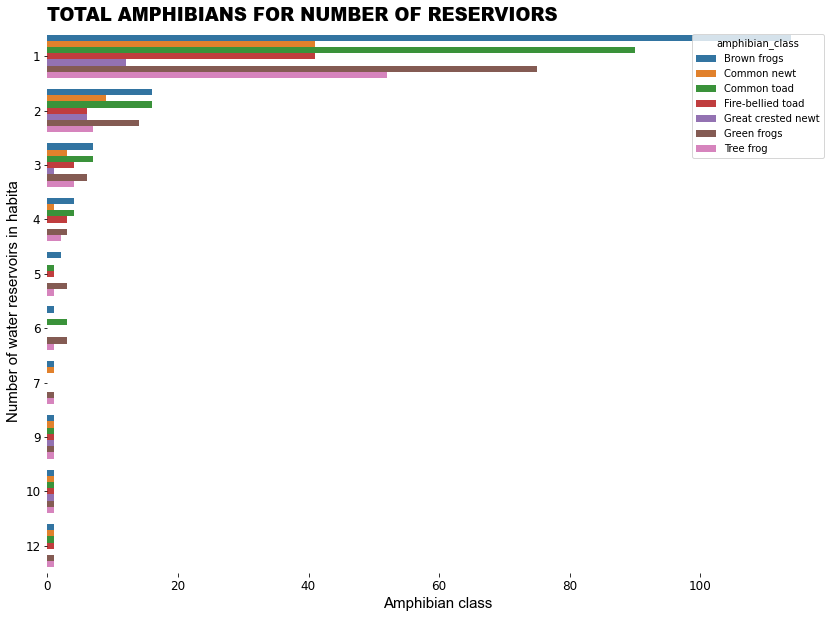

In [101]:

#Let's building a chart

plt.figure(figsize=(14,10))


ax = sns.countplot(data=new_df_SR_NR_filtered,y ="Number of water reservoirs in habita", hue = "amphibian_class")

csfont = {'fontname':'Arial'}
ax.set_title("TOTAL AMPHIBIANS FOR NUMBER OF RESERVIORS", fontdict = {'fontsize':18,'fontweight':'heavy','fontstretch':'expanded'}, **csfont, loc='left', pad=8.0)
ax.set_xlabel("Amphibian class",fontdict = {'fontsize':15}, **csfont)
ax.set_ylabel("Number of water reservoirs in habita", fontdict={'fontsize' : 15},**csfont)
#ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
label_size = 12
ax.tick_params(labelsize=label_size)


plt.savefig("charts/CountPlot Amphibian Class for Number of Reserviors.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
plt.show()

 
    

#### 2.2.6.2 - Building the Relplot visualization by NR and SR varibles by Type of Amphibian

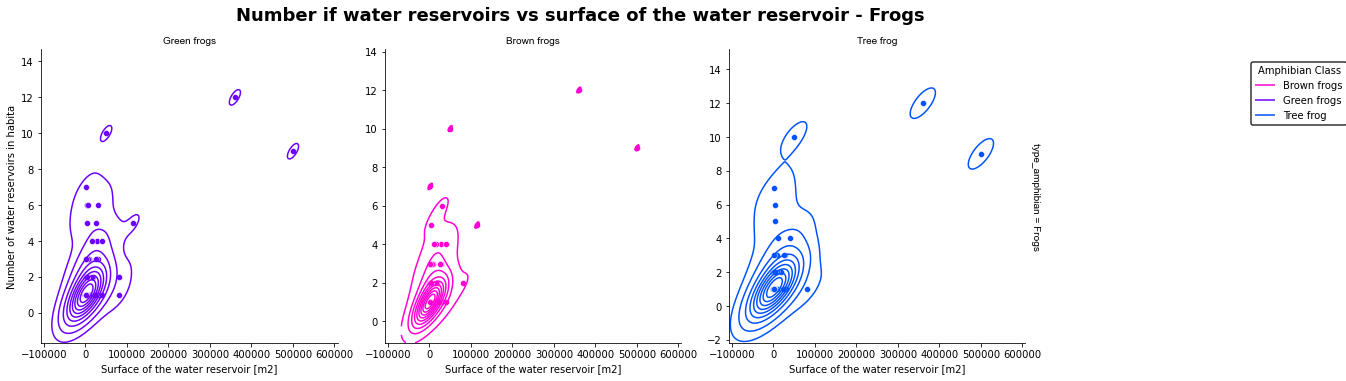

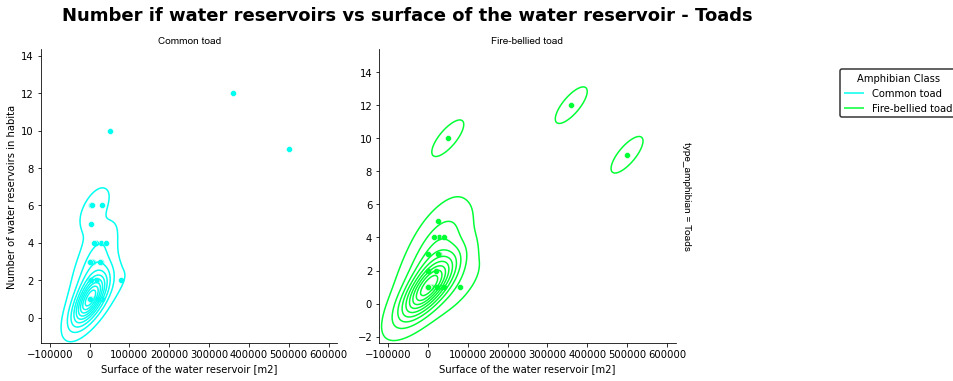

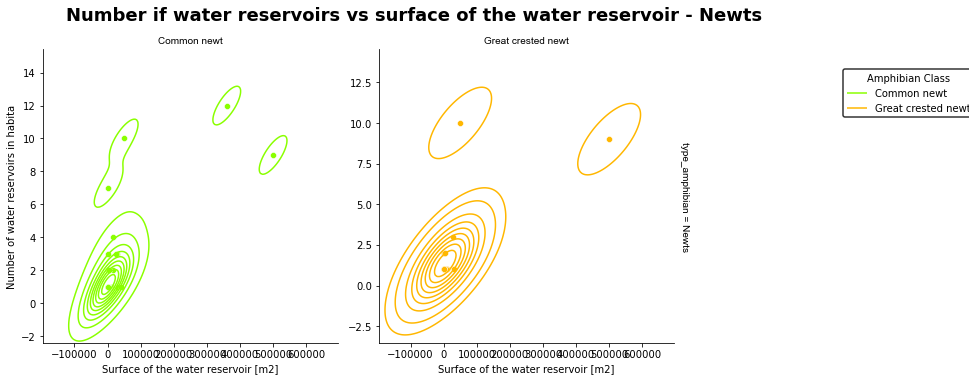

In [103]:


# Define a color palette for amphibian classes
palette = sns.color_palette("hsv_r", len(plotnum))


new_df_SR_NR_filtered = stacking_df_tranf_heads_SR_NR[
        ['Surface of the water reservoir [m2]',
         'Number of water reservoirs in habita',
         "amphibian_class",
        "type_amphibian"]
]



reserviors1= sns.FacetGrid(
    data=data_frog,
    col= "amphibian_class",
    height=5, hue= "amphibian_class", 
    col_order = order[:3],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[:3],
    margin_titles=True,
    
)
reserviors1.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors1.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors1.add_legend()



reserviors2= sns.FacetGrid(
    data=data_toad,
    col= "amphibian_class",
    height=5, hue= "amphibian_class", 
    col_order = order[3:5],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[3:5],
    margin_titles=True,
    
)
reserviors2.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors2.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors2.add_legend()





reserviors3= sns.FacetGrid(
    data=data_newt,
    col= "amphibian_class",
    height=5, 
    hue= "amphibian_class", 
    col_order = order[5:],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[5:],
    margin_titles=True,
    
)
reserviors3.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors3.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors3.add_legend()


reserviors_list = [reserviors1,reserviors2,reserviors3]

Formating.axis_subplot_label_customization(
    reserviors_list, 
    supertitle='Number if water reservoirs vs surface of the water reservoir', 
    
)

Formating.customizing_the_legend(
    reserviors_list, 
    supertitle="Amphibian Class",
    )


reserviors1.savefig("charts/Number of water reservoirs vs surface of the water reservoir relplot - Frogs.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)
reserviors2.savefig("charts/Number of water reservoirs vs surface of the water reservoir relplot - Toads.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)
reserviors3.savefig("charts/Number of water reservoirs vs surface of the water reservoir relplot - Newts.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)


plt.show()


#### 2.2.6.3 - Building the Relplot visualization by NR and SR varibles by Type of Amphibian with NR less then 100000

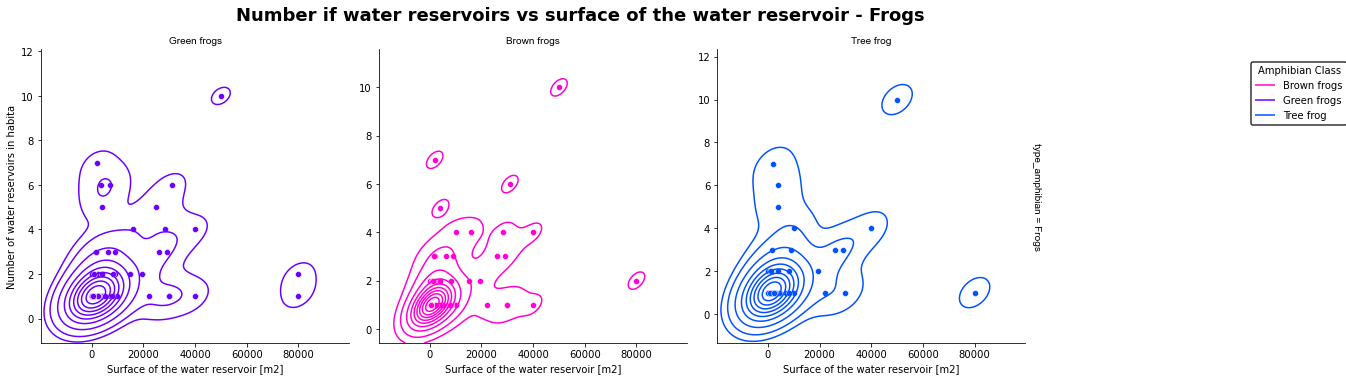

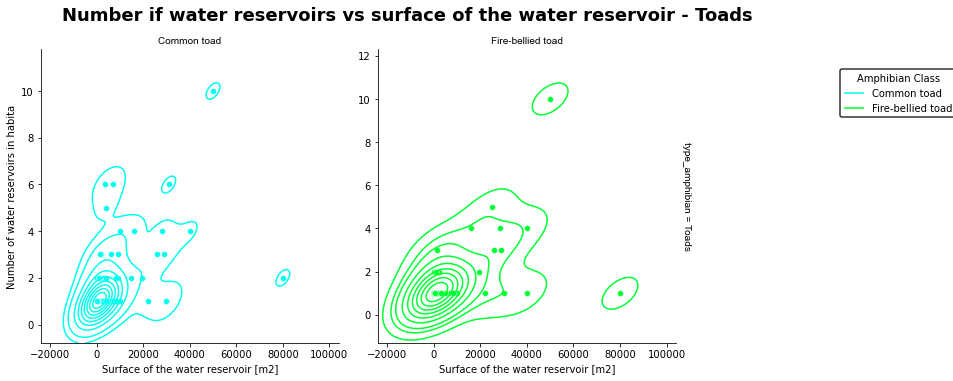

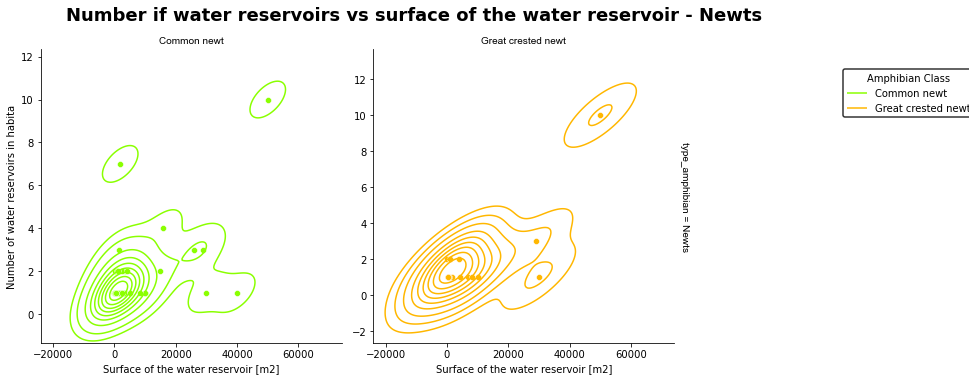

In [104]:

# Define a color palette for amphibian classes
palette = sns.color_palette("hsv_r", len(plotnum))



reserviors1= sns.FacetGrid(
    data=data_frog[data_frog['Surface of the water reservoir [m2]']< 100000],
    col= "amphibian_class",
    height=5, hue= "amphibian_class", 
    col_order = order[:3],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[:3],
    margin_titles=True,
    
)
reserviors1.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors1.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors1.add_legend()



reserviors2= sns.FacetGrid(
    data=data_toad[data_toad['Surface of the water reservoir [m2]']< 100000],
    col= "amphibian_class",
    height=5, hue= "amphibian_class", 
    col_order = order[3:5],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[3:5],
    margin_titles=True,
    
)
reserviors2.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors2.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors2.add_legend()





reserviors3= sns.FacetGrid(
    data=data_newt[data_newt['Surface of the water reservoir [m2]']< 100000],
    col= "amphibian_class",
    height=5, 
    hue= "amphibian_class", 
    col_order = order[5:],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[5:],
    margin_titles=True,
    
)
reserviors3.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors3.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors3.add_legend()


reserviors_list = [reserviors1,reserviors2,reserviors3]

Formating.axis_subplot_label_customization(
    reserviors_list, 
    supertitle='Number if water reservoirs vs surface of the water reservoir', 
    
)

Formating.customizing_the_legend(
    reserviors_list, 
    supertitle="Amphibian Class",
    )


reserviors1.savefig("charts/Number of water reservoirs vs surface of the water reservoir less 100000 - Frogs.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)
reserviors2.savefig("charts/Number of water reservoirs vs surface of the water reservoir less 100000 - Toads.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)
reserviors3.savefig("charts/Number of water reservoirs vs surface of the water reservoir less 100000 - Newts.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)


plt.show()




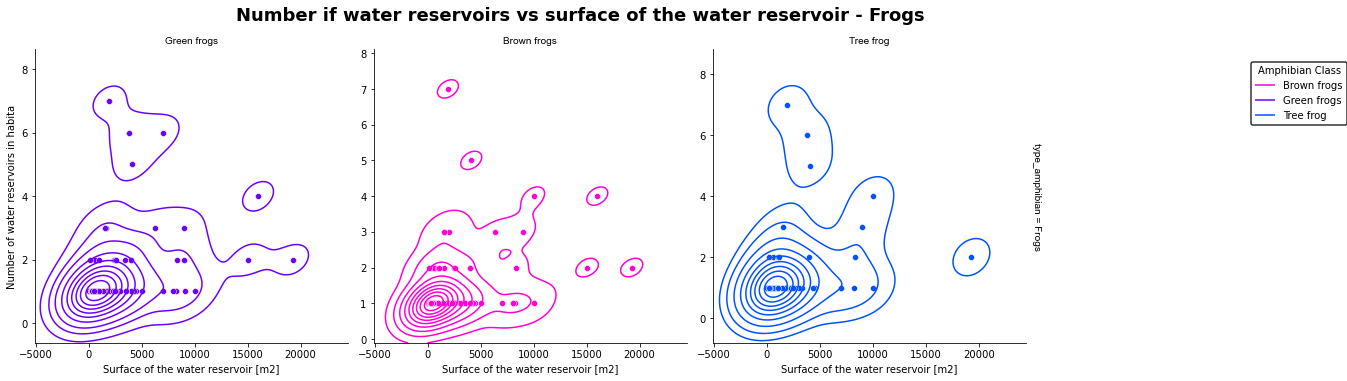

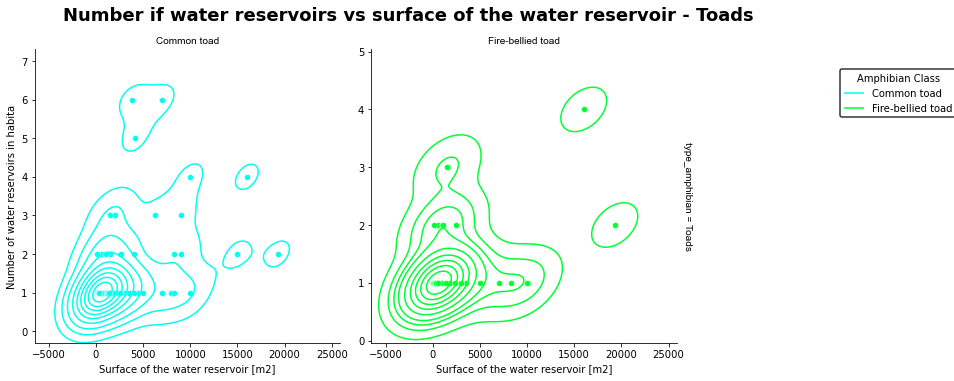

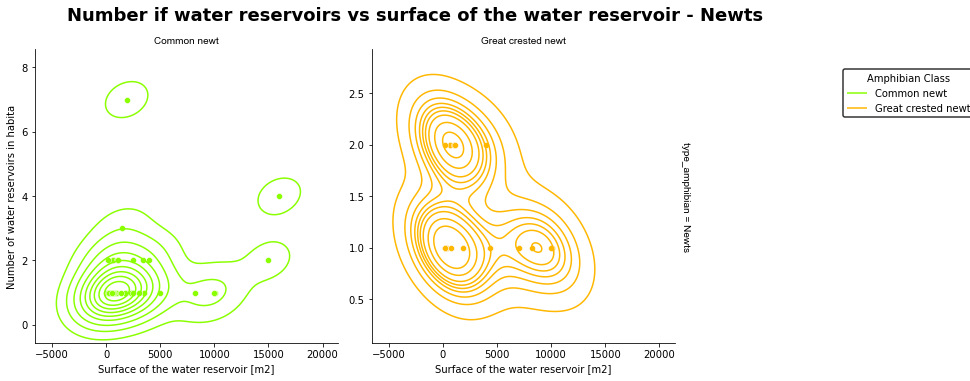

In [105]:


# Define a color palette for amphibian classes
palette = sns.color_palette("hsv_r", len(plotnum))



reserviors1= sns.FacetGrid(
    data=data_frog[data_frog['Surface of the water reservoir [m2]']< 20000],
    col= "amphibian_class",
    height=5, hue= "amphibian_class", 
    col_order = order[:3],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[:3],
    margin_titles=True,
    
)
reserviors1.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors1.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors1.add_legend()



reserviors2= sns.FacetGrid(
    data=data_toad[data_toad['Surface of the water reservoir [m2]']< 20000],
    col= "amphibian_class",
    height=5, hue= "amphibian_class", 
    col_order = order[3:5],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[3:5],
    margin_titles=True,
    
)
reserviors2.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors2.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors2.add_legend()





reserviors3= sns.FacetGrid(
    data=data_newt[data_newt['Surface of the water reservoir [m2]']< 20000],
    col= "amphibian_class",
    height=5, 
    hue= "amphibian_class", 
    col_order = order[5:],
    row = "type_amphibian",
    sharex ='row',
    sharey = 'col',
    palette=palette[5:],
    margin_titles=True,
    
)
reserviors3.map(sns.scatterplot, 'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors3.map(sns.kdeplot,'Surface of the water reservoir [m2]','Number of water reservoirs in habita' )
reserviors3.add_legend()


reserviors_list = [reserviors1,reserviors2,reserviors3]

Formating.axis_subplot_label_customization(
    reserviors_list, 
    supertitle='Number if water reservoirs vs surface of the water reservoir', 
    
)

Formating.customizing_the_legend(
    reserviors_list, 
    supertitle="Amphibian Class",
    )


reserviors1.savefig("charts/Number of water reservoirs vs surface of the water reservoir less 20000 - Frogs.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)
reserviors2.savefig("charts/Number of water reservoirs vs surface of the water reservoir less 20000 - Toads.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)
reserviors3.savefig("charts/Number of water reservoirs vs surface of the water reservoir less 20000 - Newts.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)


plt.show()




### 2.2.7 - Analysing TR varible by Type of Amphibian

# Preprocessing

## Feature Engineering:

### 1 - Variable transformation

#### Transforme the datatype to numerical ones

#### With np.iinfo we can know what type of int we quem transforme the data.

In [ ]:
np.iinfo("int16")

In [ ]:
np.iinfo("int32")

In [ ]:
np.iinfo("int8")

In [ ]:

df_tranf_heads.SR = df_tranf_heads.SR.astype("int32")

In [ ]:
# As we saw above, the NR feature goes until 12. Let's transforme it to int8
df_tranf_heads.NR = df_tranf_heads.NR.astype("int8")

In [ ]:
# As we saw above, the OR feature goes until 100, and we a talking about percentege (We'll deal with it later). Let's transforme it to int8
df_tranf_heads.OR = df_tranf_heads.OR.astype("int8")

In [ ]:
df_tranf_heads.info()

In [ ]:
memory_usage2 = df_tranf_heads.memory_usage().sum()

### 2. Categorical encoding

### Analysing the Categoric types

#### Eventhough we can see numbers this columns have categorical information, and we have to transforme it in a numerical information, than we can work with Machine Learning.

In [ ]:
#let's Analyse who are the Categorical types in this dataset.
categorical_col_types = type_and_column.T.filter(like="Categorical")
categorical_col_types

In [ ]:
#let's use one-hot-encoded to categorical ones
df_tranf_heads1= pd.get_dummies(df_tranf_heads, columns=categorical_col_types.iloc[0])

In [ ]:
# We can say that RR and BR are also categorical because the numbers represents distances, but they are not efetively the distances 
ordinal_col_types = type_and_column.T.filter(like="Ordinal")
ordinal_col_types

In [ ]:
#let's use one-hot-encoded to ordinal ones
df_tranf_heads1= pd.get_dummies(df_tranf_heads1, columns=ordinal_col_types.iloc[0])

##### Our new dataset to work with Machine Learning

In [ ]:

df_tranf_heads1

In [ ]:
#Let's that the information about the dataset after these transformations
df_tranf_heads1.info()

In [ ]:
memory_usage3 = df_tranf_heads1.memory_usage().sum()

#### We still having some object types. Let's see it.

In [ ]:
# we still having same objects types
df_tranf_heads1.select_dtypes(include = "object")

In [ ]:
#OK much of then are our target label, let's identify then.
classification_target = type_and_column.T.filter(like="Label")
classification_target

In [ ]:
classification_target_list = classification_target.iloc[0].to_list()
classification_target_list

In [ ]:
#At these columns we just have 0 and 1s. Let's transforme to another data type.
df_tranf_heads1[classification_target_list]=df_tranf_heads1[classification_target_list].astype("int8")

In [ ]:
df_tranf_heads1.shape


In [ ]:
df_tranf_heads1.info()

#### Checking the memory usage

In [ ]:

memory_usage4 = df_tranf_heads1.memory_usage().sum()

In [ ]:
#Here we can see how was the improvement in memory usage
print(f'The df without before first processing: {memory_usage1}')
print(f'The df without after first processing: {memory_usage2}')
print(f'The df without after second processing: {memory_usage3}')
print(f'The df without after third processing: {memory_usage4}')
improment = round(float(int(memory_usage4)/int(memory_usage1)*100),2)
print(f'Total of the improvement in memory usage {improment}%')

In [ ]:
#Here we can see the labels we'll work in our Multilabel classification problema, and how much the are"
amphibians_chart = df_tranf_heads1[classification_target_list].sum().to_frame().reset_index()
amphibians_chart=amphibians_chart.rename(columns={"index":"amphibian class", 0 : "Total"})
amphibians_chart

The original heads Label 1 to Label 7 are the target we are looking for

## Building the Model


In [ ]:
#Here we will drop the column that is not important to our mochine learning training e model.
df_tranf_heads1 = df_tranf_heads1.drop(columns = "ID")

In [ ]:
classification_target_list

In [ ]:
#Now we will identify the variables we will work in our ML problem.
feature = []
for col in df_tranf_heads1.columns:
    if col not in classification_target_list:
        feature.append(col)


In [ ]:
feature

In [ ]:
len(feature)

In [ ]:
# Let's split the dataset into feature and Target then we can use it.
df_x = df_tranf_heads1[feature]
df_y = df_tranf_heads1[classification_target_list]


In [ ]:
#Let's create an instance of MultiLabelBinarizer class
mlb = MultiLabelBinarizer()
mlb.fit([classification_target_list])

In [ ]:
# To work with Binary Relevance we need to convert (zeros)0 and 1(ones) into an array. Let's use the numpy for that.
enconded_mlb = df_y.to_numpy()
enconded_mlb

In [ ]:
#Let's use Fit to storage the labels in the classes_ of the binarizer.
mlb.fit([classification_target_list])
mlb.classes_

In [ ]:
#Dividing the df into training and test
train_x, test_x, train_y, test_y = train_test_split(df_x, enconded_mlb)

In [ ]:
test_x.columns

In [ ]:
len(test_x.columns)

## Random Forest Classifier

In [ ]:
#We will use the Random Forest Classifier
multi_label_model = BinaryRelevance(RandomForestClassifier())

In [ ]:
#Training
multi_label_model.fit(train_x, train_y)

In [ ]:
#Checking the metrics 
from sklearn.metrics import f1_score, hamming_loss

predictions_test_y = multi_label_model.predict(test_x)
total_hamming_loss = hamming_loss(y_true = test_y, y_pred=predictions_test_y)
f1_score = f1_score(y_true = test_y, y_pred=predictions_test_y, average = "micro")
print("Total Hamming Loss of Model :", total_hamming_loss )
print("F1 Score :", f1_score)

In [ ]:
classes = ['Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog']
for _class in classes:
    class_index = np.where(mlb.classes_ == _class)[0][0]
    print(class_index)
    multi_label_model.classifiers_[class_index].predict_proba(df_x)[:,1]
    print( multi_label_model.classifiers_[class_index].predict_proba(df_x)[:,1])

In [ ]:
print(class_index)


In [ ]:
# Now we'll write a function to do ROC curve plotting for individual binary classifiers.
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_curve (X=None, y=None, classes=[], title = None):
    lw=2
    csfont = {'fontname':'Comic Sans MS'}
    plt.figure(figsize=(12,6))
    for _class in classes:
        class_index = np.where(mlb.classes_ == _class)[0][0]
        #print(class_index)
        probs = multi_label_model.classifiers_[class_index].predict_proba(X)[:,1]
        #print(probs)
        model_fpr, model_tpr, _ = roc_curve(y[:,class_index], probs)
        roc_auc = auc(model_fpr, model_tpr)
        plt.plot(model_fpr, model_tpr, lw=lw, label='ROC curve -' + _class + '-(area =%0.2f)' % roc_auc)
        
    plt.plot([0,1],[0,1], color = "navy", lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontdict = {'fontsize':15}, **csfont)
    plt.ylabel('True Positive Rate',fontdict = {'fontsize':15}, **csfont)
    plt.title(title, fontdict = {'fontsize':18}, **csfont)
    plt.legend(loc="lower right",fontsize=12,title='ROC Curves',shadow= True, title_fontsize='medium',prop={'family':'Comic Sans MS'})
 

    plt.savefig(f"charts/{title}.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape',dpi=300)
    plt.show()
    

In [ ]:
plot_roc_curve(X = test_x, y=test_y, classes = ['Brown frogs', 'Common newt'], title = 'Roc Curve of two types of Amphians on test')

In [ ]:
plot_roc_curve(X = train_x, y=train_y, classes = ['Brown frogs', 'Common newt'], title = 'Roc Curve of two types of Amphians on train')

In [ ]:
plot_roc_curve(X = test_x, y=test_y, classes = ['Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog'], title = 'Roc Curve of all types of Amphians on test')

### We can see that this is a good classifier because the coverange of area is close to 1 when aplayed to train data.

In [ ]:
plot_roc_curve(X = train_x, y=train_y, classes = ['Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog'], title = 'Roc Curve of all types of Amphians on train')


The Hamming loss is OK and the F1 score is acetable to this execise. 

Blachnik, M., Sołtysiak, M., & Dąbrowska, D. (2019). Predicting Presence of Amphibian Species Using Features Obtained from GIS and Satellite Images. ISPRS International Journal of Geo-Information, 8(3), 123. https://doi.org/10.3390/ijgi8030123